# COGS 108 Final Project (Fall 2020)

Names: Harshi Agrawal, Ido Durst, Parth Shah, Amit Bar, and Alise Bruevich

Group: 002

# Overview

The objective of our project is to give insight into Shark Tank deals, biases, and general information that could be helpful to future Shark Tank pitchers. We combined an already created dataset online with scraped data - together, the datasets contained data on product names, descriptions, industry, entrepreneurs, season of appearance, whether or not they got a deal along with sharks gave the deal, and data on the asked and got equity, dollar amount, and evaluation. 

In our Exploratory Data Analysis, we were able to observe some trends between gender and scoring a deal with specific sharks, and between industry of the product and scoring a deal. While we could see the impact of this, we wanted to futher explore direct correlation between our features and label. We couldn't perform correlation tests for all features due to data that couldn't be normalized, but from the ones that could we found that gender is strongly correlated to obtaining a deal.

Lastly, to further explore how correlated these values are we decided to train a logisitc regression model using 10-fold cross validation. We also used a sequential feature selector to test all permutations of features we wanted to use. From this, we found that the season, gender, and ask equity play a  role in obtaining a deal

## Names

- Harshi Agrawal
- Ido Durst
- Parth Shah
- Amit Bar
- Alise Bruevich

# Research Question:

To what extent do factors such as gender, industry, ask equity, ask price, ask valuation, and season affect the likelihood of securing a deal in Shark tank?

# Background / Prior Work:

**General Introduction:**

We have always been passionate about entrepreneurship and innovation. A show that covers both of these important aspects of our lives is called Shark Tank in which entrepreneurs showcase their innovations to 5 “sharks” (wealthy entrepreneurs/investors) in hopes of getting funding and a successful mentor to help them expand their business. We want to analyze which factor of the business matters the most when trying to get investments (a pivotal part of the entrepreneurship cycle). It peaked our interest because businesses are so important for our economy, and we wanted to see how businesses can take off. 

**How we got to our hypothesis (which is in the next cell):**

Reading up on some of the deals made on the show, we saw that many of these deals had a pretty successful start to their company. We did not read much about how a company that hadn’t sold any products or had low revenue seemed to make deals. This is partly how it led to our hypothesis.

**Why is this topic important?:**

This topic is very important since it can be argued that entrepreneurship is the backbone of the American economy. This data science project will help entrepreneurships determine which part of their company/product needs to be focused on when pitching to sharks (and other investors from outside of Shark Tank, as they are similar).

**Previous Work:**

Previous analyses have been conducted surrounding the show and the success of pitches, but it has mainly focused on the pitch itself. Based on data collected by Halle Tecco, analysis has been done to indicate that gender bias may be occurring. For instance, they found that although women are underrepresented on the show itself, they actually tend to have a higher percentage of deals being made by sharks. The article also demonstrated how the top industry was food and beverage. They also attempt to go into if there is an increase in the amount of deals being made, looking at which sharks make the most amount of deals and analyzing how much money an entrepreneur is willing to give up to make a deal. (https://thehustle.co/shark-tank-data-analysis-10-seasons/). Another resource that we found demonstrated charts on the probabilities of a shark making a deal on gender, and they concluded how there are definite gaps between sharks making deals between the genders, but could not say it was a cause (https://medium.com/dig3st/swimming-or-sinking-in-the-shark-tank-does-gender-matter-aafa88180f7). So, based on some of these sources, we have seen that there is a gap based on gender, so there could be a potential bias. In terms of racial bias, we could not find any data analysis done by previous work on whether or not race affected deals being made, so we are unsure of racial bias (we will take a look at this later in our project). Our research is different in the sense that we wish to look at how all of these factors as well as others (gender, industry, equity, and ask price) all together work to possibly affect their pitch success rather than simply looking individually at specific variables.

**References:**

1. https://docs.google.com/spreadsheets/d/1Lr0gi_QJB_JU0lBMjJ7WiBRxA0loml1FlM-KlmKsaEY/edit#gid=0 
2. https://thehustle.co/shark-tank-data-analysis-10-seasons/
3. https://medium.com/dig3st/swimming-or-sinking-in-the-shark-tank-does-gender-matter-aafa88180f7

# Hypothesis:

Our main hypothesis is that the valuation ((1 / equity ask) * price ask * 100) in comparison with the success of the company (revenue/year, growth, number of consumers) is the most influential in the likelihood of securing a deal with a shark. We believe that this will be the outcome because some of us have watched the show and have noticed that usually sharks will use the valuations to determine if the company is worth investing in.

# Getting the data:

First things first: we need to collect all the data! Thankfully, a data scientist named Halle has already collected plenty of shark tank data that we will be using and building on (source: https://docs.google.com/spreadsheets/d/1Lr0gi_QJB_JU0lBMjJ7WiBRxA0loml1FlM-KlmKsaEY/edit#gid=0). We also scraped data from a site called Shark Tank Tales (source: https://sharktanktales.com/). Below is our process of collecting these datas and combining them into a singular, complete dataframe! The layout is as follows:

- First, import and clean Halle's data
- Second, scrape and clean Shark Tank Tales data
- Third, combine data sets. Then check if there is any invalid data and clean/fix anything that is incorrect

## First, import and clean Halle's data (named df)

In [1]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import time
import numpy as np
from urllib.request import Request, urlopen
import warnings
import math
import seaborn as sns
from scipy.stats import chi2_contingency, normaltest

In [2]:
df = pd.read_csv('SharkTankData.csv', header=1)

In [3]:
df = df.drop([0, 1])
df = df.drop(columns=["Unnamed: 0", "No. in series", "Description", "$ per shark", "Unnamed: 9", "Details / Notes"])
df = df.reset_index(drop=True)
df.head()

,Season,Episode,Company,Deal,Industry,Entrepreneur Gender,ASK,Unnamed: 11,Unnamed: 12,DEAL,...,Royalty Deal?,Loan?,Barbara\nCorcoran,Mark\nCuban,Lori\nGreiner,Robert Herjavec,Daymond\nJohn,Kevin\nO'Leary,Guest,# Sharks
0,1.0,1.01,Ava the Elephant,Yes,Health / Wellness,Female,"$50,000",15.00%,"$333,333","$50,000",...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,1.01,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",10.00%,"$4,600,000","$460,000",...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0
2,1.0,1.01,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1.0,1.01,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,1.01,Ionic Ear,No,Software / Tech,Male,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
df.rename(columns = {'ASK':'Ask_amount', 'Unnamed: 11':'Ask_equity', 
                    'Unnamed: 12':'Ask_valuation', 'DEAL':'Deal_amount',
                    'Unnamed: 14':'Deal_equity', 'Unnamed: 15':'Deal_valuation',
                    'Royalty Deal?': 'Royalty', 'Entrepreneur Gender': 'Gender',
                    'Loan?':'Loan', 'Barbara\nCorcoran':'Barbara', 
                    'Mark\nCuban':'Mark', 'Lori\nGreiner':'Lori',
                    'Robert Herjavec':'Robert','Daymond\nJohn':'Daymond',
                    "Kevin\nO'Leary":'Kevin'}, inplace = True)

In [5]:
df.columns.values

array(['Season', 'Episode', 'Company', 'Deal', 'Industry', 'Gender',
       'Ask_amount', 'Ask_equity', 'Ask_valuation', 'Deal_amount',
       'Deal_equity', 'Deal_valuation', 'Royalty', 'Loan', 'Barbara',
       'Mark', 'Lori', 'Robert', 'Daymond', 'Kevin', 'Guest', '# Sharks'],
      dtype=object)

In [6]:
df['Ask_amount'].fillna(value=-1)
df['Ask_equity'].fillna(value=-1)
df['Ask_valuation'].fillna(value=-1)
df['Deal_amount'].fillna(value=-1)
df['Deal_equity'].fillna(value=-1)
df['Deal_valuation'].fillna(value=-1)

0         $90,909
1        $920,000
2              -1
3              -1
4              -1
          ...    
890    $1,400,000
891    $1,666,667
892    $5,000,000
893      $300,300
894            -1
Name: Deal_valuation, Length: 895, dtype: object

In [7]:
def standardize_binary(string):
    if math.isnan(float(string)):
        return 0
    else:
        return 1

In [8]:
df['Barbara'] = df['Barbara'].apply(standardize_binary)
df['Lori']= df['Lori'].apply(standardize_binary)
df['Mark'] = df['Mark'].apply(standardize_binary)
df['Robert'] = df['Robert'].apply(standardize_binary)
df['Daymond'] = df['Daymond'].apply(standardize_binary)
df['Kevin'] = df['Kevin'].apply(standardize_binary)
df['Guest'] = df['Guest'].apply(standardize_binary)

In [9]:
def standardize_yesNo(string):
    try:
        if 'Y' in string:
            return 1
        else:
            return 0
    except:
        return -1

In [10]:
df['Royalty'] = df['Royalty'].apply(standardize_yesNo)
df['Loan'] = df['Loan'].apply(standardize_yesNo) #-1 dont know, 0 for no, 1 for yes

In [11]:
def standardize_dollar(string):
    try:
        string = string.lower()
        string = string.strip()
    
        string = string.replace('$', '')
        string = string.replace(',', '')
    
        string = string.strip()
        
        return int(string)
    except:
        return -1

In [12]:
def standardize_percent(string):
    try:
        string = string.lower()
        string = string.strip()
    
        string = string.replace('%', '')
        string = string.replace(',', '')
    
        string = string.strip()
    
        return float(string)
    except:
        return -1

In [13]:
df['Ask_amount'] = df['Ask_amount'].apply(standardize_dollar)
df['Ask_valuation'] = df['Ask_valuation'].apply(standardize_dollar)
df['Deal_amount'] = df['Deal_amount'].apply(standardize_dollar)
df['Deal_valuation'] = df['Deal_valuation'].apply(standardize_dollar)
df['Deal_equity'] = df['Deal_equity'].apply(standardize_percent)
df['Ask_equity'] = df['Ask_equity'].apply(standardize_percent)
df['# Sharks'] = df['Barbara'] + df['Mark'] + df['Lori'] + df['Robert'] + df['Daymond'] + df['Kevin'] + df['Guest']

In [14]:
df['Ask_valuation'].value_counts()

-1           265
 1000000      59
 500000       46
 2500000      39
 2000000      39
            ... 
 28000000      1
 120000        1
 1140000       1
 1166667       1
 13157895      1
Name: Ask_valuation, Length: 111, dtype: int64

In [15]:
df['Deal_equity'].value_counts()[:10]

-1.0     400
 25.0     78
 20.0     73
 30.0     46
 10.0     45
Name: Deal_equity, dtype: int64

In [16]:
def standarize_gender(string):
    if 'Male' in string:
        return 0
    elif 'Female' in string:
        return 1
    else:
        return 2

In [17]:
df['Gender'] = df['Gender'].apply(standarize_gender)
df['Gender'].value_counts()

0    535
1    221
2    139
Name: Gender, dtype: int64

In [18]:
def standarize_deal(string):
    if 'Yes' in string:
        return 1
    else:
        return 0

In [19]:
df['Deal'] = df['Deal'].apply(standarize_deal)
df['Deal'].value_counts()

1    499
0    396
Name: Deal, dtype: int64

In [20]:
df['Industry'].value_counts()

Food and Beverage              182
Fashion / Beauty               167
Lifestyle / Home               140
Children / Education            93
Fitness / Sports / Outdoors     93
Software / Tech                 60
Pet Products                    41
Health / Wellness               36
Media / Entertainment           23
Business Services               17
Automotive                      12
Travel                          11
Green/CleanTech                 11
Uncertain / Other                9
Name: Industry, dtype: int64

In [21]:
industries = list(df['Industry'].unique())
d = {}
for i, industry in enumerate(industries):
    d[industry] = i

In [22]:
def standarize_industry(string):
    return d[string]

In [23]:
df['Industry'] = df['Industry'].apply(standarize_industry)
df['Industry'].value_counts()

1     182
7     167
3     140
9      93
5      93
4      60
10     41
0      36
8      23
2      17
6      12
12     11
11     11
13      9
Name: Industry, dtype: int64

## Second, scrape and clean Shark Tank Tales data (named df2)

First, we set global variables that we can use throughout scraping the data. We then create an "immutable dataset", the purpose of which is so that we don't have to continually re-scrape all the data if we make a mistake while cleaning the data (it takes at least 15-20 minutes to scrape all the data...):

In [24]:
# Global vars here that are used throughout scraping second data set (can use to easily rename columns, avoid typos, etc)
PRODUCT = 'Product'
SEASON_EPISODE = 'Season/Episode'
SEASON = 'Season'
DESCRIPTION = 'Description'
ENTREPRENEUR = 'Entrepreneur'
DEAL_ASKED_FOR = 'Deal Asked For'
DEAL_GOT = 'Deal Got'
SHARKS = 'Sharks'
CURRENT_STATUS = 'Current Status'
CATEGORIES = 'Categories'

NUM_SEASONS = 10

In [25]:
immutable_data = pd.DataFrame(columns=[PRODUCT, SEASON_EPISODE, DESCRIPTION, ENTREPRENEUR, DEAL_ASKED_FOR, DEAL_GOT, SHARKS, CURRENT_STATUS])

#### Scraping the data
Here is the first function we wrote! This function scrapes a specific product page URL and returns the product information we require:

In [26]:
# Create a function that scrapes a specific product_page url
def get_product_from_url(url):
    product_page = requests.get(url)
    product_page_soup = BeautifulSoup(product_page.content, 'html.parser')

    product = product_page_soup.find('h1', class_='entry-title')
    season_episode = product_page_soup.find('p', class_='post-ep')
    
    # use this to handle class name typos that editors created
    if len(season_episode) == 0:
        season_episode = product_page_soup.find('h3', class_='post-ep')
        if len(season_episode) == 0:
            raise Exception

    # use this to handle other class name typos that editors created (using h3 tags instead of p tags)
    try:
        scraped = product_page_soup.find_all('p', class_='post-desc')
        # trigger an exception if using p tag is incorrect (should use h3 tag instead)
        if (scraped == []):
            raise Exception
            
        # handle when the current status is unknown
        if len(scraped) == 6:
            return {
                PRODUCT: product.text,
                SEASON_EPISODE: season_episode.text,
                DESCRIPTION: scraped[0].text,
                ENTREPRENEUR: scraped[1].text,
                DEAL_ASKED_FOR: scraped[2].text,
                DEAL_GOT: scraped[3].text,
                SHARKS: scraped[4].text,
                CURRENT_STATUS: scraped[5].text
            }

        elif len(scraped) == 5:
            return {
                PRODUCT: product.text,
                SEASON_EPISODE: season_episode.text,
                DESCRIPTION: scraped[0].text,
                ENTREPRENEUR: scraped[1].text,
                DEAL_ASKED_FOR: scraped[2].text,
                DEAL_GOT: scraped[3].text,
                SHARKS: scraped[4].text,
                CURRENT_STATUS: "NA"
            }


    except:
        scraped = product_page_soup.find_all('h3', class_='post-desc')

        # raise an exception if the h3 tag is also the incorrect tag. this should not occur unless there are typos
        # when there are new website edits
        if scraped == []:
            raise Exception
            
        # handle when the current status is unknown
        if len(scraped) == 6:
            return {
                PRODUCT: product.text,
                SEASON_EPISODE: season_episode.text,
                DESCRIPTION: scraped[0].text,
                ENTREPRENEUR: scraped[1].text,
                DEAL_ASKED_FOR: scraped[2].text,
                DEAL_GOT: scraped[3].text,
                SHARKS: scraped[4].text,
                CURRENT_STATUS: scraped[5].text
            }

        elif len(scraped) == 5:
            return {
                PRODUCT: product.text,
                SEASON_EPISODE: season_episode.text,
                DESCRIPTION: scraped[0].text,
                ENTREPRENEUR: scraped[1].text,
                DEAL_ASKED_FOR: scraped[2].text,
                DEAL_GOT: scraped[3].text,
                SHARKS: scraped[4].text,
                CURRENT_STATUS: "NA"
            }
        

Next, we have the actual code that gets all the data! It uses the function defined above.

In [27]:
shark_tales_season_url_base = 'https://sharktanktales.com/shark-tank-pitches/shark-tank-season-'

# use to track errors
errors = []
num_products_per_season = {}
num_products = 0
num_product_copies = 0

# loop through all seasons
for i in range(1, NUM_SEASONS + 1):
    season_base_url = shark_tales_season_url_base + str(i)
    # get this season's product urls (for each page)
    page = 1
    
    # shark tank tales' website is designed to query for more products when a user scrolls down far enough. this makes it
    # hard to scrape -- to solve this, we query for the specific "scrolling page number", which is basically how far down
    # a user has scrolled. Since we don't know how many pages there are, we have to keep querying until we've reached an
    # unreachable "scrolling page number" -- at this point, we've reached the end of the season and can break out of the
    # while loop to continue onto the next season.
    while (True):
        # get current season's "scrolling page"
        season_page_url = season_base_url + '/page/' + str(page) + '/'
        season_page = requests.get(season_page_url)
        # break if reached end of the season
        if (season_page.status_code == 404):
            break
        
        season_page_soup = BeautifulSoup(season_page.content, 'html.parser')
        product_urls_html = season_page_soup.find_all('h2', class_="entry-title")

        # for each product, get the product's data
        for product_url_html in product_urls_html:
            url = product_url_html.find('a').get('href')
            
            # use to keep track of errors
            try:
                product_dict = get_product_from_url(url)
                
                # check if there's a copy
                if len(immutable_data[immutable_data[PRODUCT] == product_dict[PRODUCT]].index) > 0:
                    num_product_copies += 1
                    continue
                immutable_data = immutable_data.append(product_dict, ignore_index=True)
                
                # keep a count of the products
                num_products_per_season[i] = num_products_per_season.get(i, 0) + 1
                num_products += 1
            
            except:
                errors.append(url)
                continue
            
        page += 1

# print errors, which will be handled in the process of cleaning data
print(str(len(errors)) + ' errors:')
print(errors)
print(str(num_products) + ' products')
print(str(num_product_copies) + ' copies of products')

3 errors:
['https://sharktanktales.com/signalvault-update/', 'https://sharktanktales.com/ora-organic-shark-tank-update/', 'https://sharktanktales.com/barbell-apparel-shark-tank-update/']
881 products
6 copies of products


In [28]:
# IMPORTANT: only change data and not immutable_data in following cells! This allows for us to simply reset the dataframe
# to immutable_data (e.g. the original copy of data) so that we don't have to rescrape everything
df2 = immutable_data.copy(deep = True)

Fantastic! We've scraped all of the data but... oh no! We have a few errors. After looking on Shark Tank Tales' website, we learned that these errors were caused by typos. We fixed them by finding the correct data online (googling and watching YouTube videos of the appropriate Shark Tank episodes) and then set them manually:

In [29]:
# Add missing data from shark tank tales website (they had website errors)
# https://sharktanktales.com/signalvault-update/
df2 = df2.append({
        PRODUCT: 'signalvault',
        SEASON_EPISODE: 'SEASON 7 EPISODE 1',
        DESCRIPTION: 'protects your credit and debit card info from being stolen',
        ENTREPRENEUR: 'Chris Gilpin',
        DEAL_ASKED_FOR: '$200,000 for 12.5%',
        DEAL_GOT: '$200,000 for 25%',
        SHARKS: 'Lori and Robert',
        CURRENT_STATUS: 'IN BUSINESS'
    }, ignore_index=True)

# https://sharktanktales.com/ora-organic-shark-tank-update/
df2 = df2.append({
        PRODUCT: 'ora organic',
        SEASON_EPISODE: 'SEASON 8 EPISODE 18',
        DESCRIPTION: 'sustainable plant-based supplements',
        ENTREPRENEUR: 'Will Smelko and Ronald Chang',
        DEAL_ASKED_FOR: '$375,000 for 5%',
        DEAL_GOT: 'NO DEAL',
        SHARKS: 'NO SHARK',
        CURRENT_STATUS: 'IN BUSINESS'
    }, ignore_index=True)

# https://sharktanktales.com/barbell-apparel-shark-tank-update/
df2 = df2.append({
        PRODUCT: 'BARBELL APPAREL',
        SEASON_EPISODE: 'SEASON 8 EPISODE 9',
        DESCRIPTION: 'apparel for muscular bodies',
        ENTREPRENEUR: 'Hunter Molzen and Alex Hanson',
        DEAL_ASKED_FOR: '$500,000 for 5%',
        DEAL_GOT: 'NO DEAL',
        SHARKS: 'NO SHARK',
        CURRENT_STATUS: 'NA'
    }, ignore_index=True)

#### Cleaning the data

Now, we begin the process of cleaning the data we've scraped! Below, we write a function for each portion of the data we want to "standardize" (e.g. clean) and then call it on the appropriate data frame column.

First, we wrote a function that will be called within each of the standardizing functions (aptly named "standard_standardize"). Each of the cells followed are the rest of the standardize functions.

In [30]:
# Run this before standardizing the data
import re

# code to run in each standardize function
def standard_standardize(string):
    string = string.lower()
    string = string.strip()
    # replace it with the correct dash
    string = string.replace('–', '-')
    return string

In [31]:
# Clean the data
def standardize_product(string):
    string = standard_standardize(string)
    string = string.replace('- update', '')
    string = string.replace('-update', '')
    string = string.replace('update', '')
    string = string.strip()
    return string

df2[PRODUCT] = df2[PRODUCT].apply(standardize_product)

In [32]:
def standardize_season(string):
    string = standard_standardize(string)
    string = string[string.find('n') + 1: string.find('ep')].strip()
    return string

df2[SEASON_EPISODE] = df2[SEASON_EPISODE].apply(standardize_season)

In [33]:
def standardize_description(string):
    string = standard_standardize(string)
    return string

df2[DESCRIPTION] = df2[DESCRIPTION].apply(standardize_description)

In [34]:
def standardize_entrepreneur(string):
    string = standard_standardize(string)
    # change it to be an array of the entrepreneurs
    string_array = [s.strip() for s in re.split('and|,', string)]
    return string_array 

df2[ENTREPRENEUR] = df2[ENTREPRENEUR].apply(standardize_entrepreneur)

In [35]:
def standardize_price_for_percentage(string):
    string = standard_standardize(string)
    split_strings = string.split('for')
    no_punc_strings = [s.replace('$', '').replace('%', '').replace(',', '').strip() for s in split_strings]
    return no_punc_strings

In [36]:
def standardize_asked_for(string):
    string = standard_standardize(string)
    strings = standardize_price_for_percentage(string)
    return strings
    
df2[DEAL_ASKED_FOR] = df2[DEAL_ASKED_FOR].apply(standardize_asked_for)

In [37]:
def standardize_got(string):
    string = standard_standardize(string)
    if string == "no deal":
        return string

    string = standard_standardize(string)
    strings = standardize_price_for_percentage(string)
    return strings

df2[DEAL_GOT] = df2[DEAL_GOT].apply(standardize_got)

In [38]:
def standardize_sharks(string):
    string = standard_standardize(string)
    if string == 'no shark':
        return string

    strings = [s.strip() for s in re.split('and|,', string)]
    return strings

df2[SHARKS] = df2[SHARKS].apply(standardize_sharks)

In [39]:
def standardize_status(string):
    string = standard_standardize(string)
    return string

df2[CURRENT_STATUS] = df2[CURRENT_STATUS].apply(standardize_status)

We've now correctly standardized all the scraped data! Below we print the head of the dataframe just to make sure that it looks correct.

In [40]:
df2.head()

,Product,Season/Episode,Description,Entrepreneur,Deal Asked For,Deal Got,Sharks,Current Status
0,send a ball,1,bouncy ball postcard service,"[michele kapustka, melisa moroko]","[86000, 20]",no deal,no shark,in business
1,pillars of slippers,1,in home shoe shopping experience for women,[nicole jones],"[150000, 15]",no deal,no shark,out of business
2,qubits - stem building toy set,1,modular construction blocks stem toy,[mark burginger],"[90000, 51]","[90000, 51]",[daymond john],in business
3,llama brew,1,liquid llama-based dung fertilizer,"[aida lough, phil lough]","[125000, 10]",no deal,no shark,in business
4,nubrella,1,hands-free umbrella and windbreaker system,[alan kaufman],"[200000, 25]","[200000, 51]","[kevin harrington, daymond john]",in business


## Third, combine data sets (into a dataframe named df_full)
Check if there is any invalid data and clean/fix anything that is incorrect

Below, we combine the datasets and also clean the data so that they match eachother.

Extra important: We need to make the products match each other perfectly so that we can merge the datasets based on the product name.

In [41]:
# Create function to standardize the product across both dataframes
import string
import re
def standardize_product(s):
    s = s.lower()

    s = s.replace(' and ', '')
    s = s.replace(' the ', '')
    s = s.replace(' ', '')
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~’'''
  
    for p in punc:  
        s = s.replace(p, '') 
    
    return s

In [42]:
# First apply the standardize function to Halle's dataframe
df['CompanyStandard'] = df['Company'].apply(standardize_product)
df

,Season,Episode,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,...,Loan,Barbara,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,CompanyStandard
0,1.0,1.01,Ava the Elephant,1,0,1,50000,15.0,333333,50000,...,-1,1,0,0,0,0,0,0,1,avaelephant
1,1.0,1.01,Mr. Tod's Pie Factory,1,1,0,460000,10.0,4600000,460000,...,-1,1,0,0,0,1,0,0,2,mrtodspiefactory
2,1.0,1.01,Wispots,0,2,0,-1,-1.0,-1,-1,...,-1,0,0,0,0,0,0,0,0,wispots
3,1.0,1.01,College Foxes Packing Boxes,0,3,0,-1,-1.0,-1,-1,...,-1,0,0,0,0,0,0,0,0,collegefoxespackingboxes
4,1.0,1.01,Ionic Ear,0,4,0,-1,-1.0,-1,-1,...,-1,0,0,0,0,0,0,0,0,ionicear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,10.0,10.22,Cubicall,1,3,0,350000,10.0,3500000,350000,...,-1,1,0,0,0,0,0,0,1,cubicall
891,10.0,10.23,Fat Shack,1,1,0,250000,7.5,3333333,250000,...,-1,0,1,0,0,0,0,0,1,fatshack
892,10.0,10.23,Quickflip,1,7,0,500000,5.0,10000000,500000,...,-1,0,0,1,0,0,0,0,1,quickflip
893,10.0,10.23,BatBnB,1,3,0,100000,16.0,625000,100000,...,-1,0,0,0,0,0,1,0,1,batbnb


In [43]:
# Then apply the standardize function to our scraped data
df2['ProductStandard'] = df2['Product'].apply(standardize_product)
# Also drop the repeated and unnecessary collected data
df2 = df2.drop(columns=["Season/Episode", "Description", "Entrepreneur", "Sharks"])
df2 = df2.reset_index(drop=True)
df2

,Product,Deal Asked For,Deal Got,Current Status,ProductStandard
0,send a ball,"[86000, 20]",no deal,in business,sendaball
1,pillars of slippers,"[150000, 15]",no deal,out of business,pillarsofslippers
2,qubits - stem building toy set,"[90000, 51]","[90000, 51]",in business,qubitsstembuildingtoyset
3,llama brew,"[125000, 10]",no deal,in business,llamabrew
4,nubrella,"[200000, 25]","[200000, 51]",in business,nubrella
...,...,...,...,...,...
879,bear minimum,"[100000, 20]","[100000, 25]",in business,bearminimum
880,boxlock,"[1000000, 5]",no deal,in business,boxlock
881,signalvault,"[200000, 12.5]","[200000, 25]",in business,signalvault
882,ora organic,"[375000, 5]",no deal,in business,oraorganic


In [44]:
#find similar products
for i, product1 in enumerate(df2['ProductStandard']):
    found = False
    for product in df['CompanyStandard']:
        if product in product1:
            if product!=product1:
                df2.iloc[i, df2.columns.get_loc('ProductStandard')] = product
            found = True
            break

In [45]:
df_full = df.merge(df2, how='inner', left_on='CompanyStandard', right_on="ProductStandard")
df_full.shape

(740, 28)

In [46]:
df_full.columns.values

array(['Season', 'Episode', 'Company', 'Deal', 'Industry', 'Gender',
       'Ask_amount', 'Ask_equity', 'Ask_valuation', 'Deal_amount',
       'Deal_equity', 'Deal_valuation', 'Royalty', 'Loan', 'Barbara',
       'Mark', 'Lori', 'Robert', 'Daymond', 'Kevin', 'Guest', '# Sharks',
       'CompanyStandard', 'Product', 'Deal Asked For', 'Deal Got',
       'Current Status', 'ProductStandard'], dtype=object)

In [47]:
df_full = df_full.drop(columns=["Product", "Episode", "CompanyStandard", "ProductStandard"])
df_full = df_full.reset_index(drop=True)
df_full

,Season,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,Deal_equity,...,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,Deal Asked For,Deal Got,Current Status
0,1.0,Ava the Elephant,1,0,1,50000,15.0,333333,50000,55.0,...,0,0,0,0,0,0,1,"[50000, 15]","[50000, 55]",in business
1,1.0,Wispots,0,2,0,-1,-1.0,-1,-1,-1.0,...,0,0,0,0,0,0,0,"[1200000, 10]",no deal,out of business
2,1.0,College Foxes Packing Boxes,0,3,0,-1,-1.0,-1,-1,-1.0,...,0,0,0,0,0,0,0,"[250000, 25]",no deal,in business
3,1.0,Ionic Ear,0,4,0,-1,-1.0,-1,-1,-1.0,...,0,0,0,0,0,0,0,"[1000000, 15]",no deal,out of business
4,1.0,A Perfect Pear,1,1,1,-1,-1.0,-1,500000,50.0,...,0,0,1,0,1,0,2,"[500000, 15]","[500000, 50]",out of business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,10.0,DoughP,0,1,1,450000,10.0,4500000,-1,-1.0,...,0,0,0,0,0,0,0,"[450000, 10]",no deal,in business
736,10.0,Cubicall,1,3,0,350000,10.0,3500000,350000,25.0,...,0,0,0,0,0,0,1,"[350000, 10]","[350000, 25]",in business
737,10.0,Fat Shack,1,1,0,250000,7.5,3333333,250000,15.0,...,1,0,0,0,0,0,1,"[250000, 7.5]","[250000, 15]",in business
738,10.0,BatBnB,1,3,0,100000,16.0,625000,100000,33.3,...,0,0,0,0,1,0,1,"[100000, 16]","[100000, 33.3]",in business


In [49]:
warnings.filterwarnings('ignore')
#fill in ask_amount
for i in range(len(df_full)):
    if df_full.loc[i, 'Ask_amount']==-1:
        ask_amount = df_full.loc[i,'Deal Asked For']
        try:
            df_full.loc[i,'Ask_amount']=int(ask_amount[0])
        except:
            if ask_amount=='':
                df_full.loc[i,'Ask_amount'] = -1
            #handle specific cases
            elif ask_amount[0] == '200k':
                df_full.loc[i,'Ask_amount'] = 200000
            elif ask_amount[0] == '250k':
                df_full.loc[i,'Ask_amount'] = 250000
            elif '9000' in ask_amount[0]:
                df_full.loc[i,'Ask_amount'] = 9000
            elif 'mil' in ask_amount[0]:
                df_full.loc[i,'Ask_amount'] = 5000000

In [50]:
warnings.filterwarnings('ignore')
#fill in ask_equity
for i in range(len(df_full)):
    if df_full.loc[i, 'Ask_equity']==-1:
        ask_equity = df_full.loc[i,'Deal Asked For']
        try:
            df_full.loc[i,'Ask_equity']=int(ask_equity[1])
        except:
            if ask_equity[0]=='':
                df_full.loc[i,'Ask_equity'] = -1
            elif '15' in ask_equity[0]:
                df_full.loc[i,'Ask_equity'] = 15
            elif ask_equity[1] =='a 20':
                df_full.loc[i,'Ask_equity'] = 20
            elif ask_equity[1] == '70&':
                df_full.loc[i,'Ask_equity'] = 70
            elif '100 +' in ask_equity[1]:
                df_full.loc[i,'Ask_equity'] = 100
            else:
                print(ask_equity)

In [51]:
df_full = df_full.drop(columns=["Deal Asked For", "Deal Got"])
df_full = df_full.reset_index(drop=True)

In [52]:
# we also want to drop royalty and loan columns since we will not look at that when answering our question
df_full = df_full.drop(columns=['Royalty', 'Loan'])
df_full = df_full.reset_index(drop=True)

In [53]:
def standardize_status(string):
    if "out of business" in string:
        return 0
    elif "in business" in string or "acquired" in string or "launch" in string:
        return 1
    else:
        return -1 #na or unknown

In [54]:
df_full['Current Status'] = df_full['Current Status'].apply(standardize_status)
df_full.rename(columns = {'Current Status':'Status'}, inplace = True)

In [55]:
df_full

,Season,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,Deal_equity,Deal_valuation,Barbara,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,Status
0,1.0,Ava the Elephant,1,0,1,50000,15.0,333333,50000,55.0,90909,1,0,0,0,0,0,0,1,1
1,1.0,Wispots,0,2,0,1200000,10.0,-1,-1,-1.0,-1,0,0,0,0,0,0,0,0,0
2,1.0,College Foxes Packing Boxes,0,3,0,250000,25.0,-1,-1,-1.0,-1,0,0,0,0,0,0,0,0,1
3,1.0,Ionic Ear,0,4,0,1000000,15.0,-1,-1,-1.0,-1,0,0,0,0,0,0,0,0,0
4,1.0,A Perfect Pear,1,1,1,500000,15.0,-1,500000,50.0,1000000,0,0,0,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,10.0,DoughP,0,1,1,450000,10.0,4500000,-1,-1.0,-1,0,0,0,0,0,0,0,0,1
736,10.0,Cubicall,1,3,0,350000,10.0,3500000,350000,25.0,1400000,1,0,0,0,0,0,0,1,1
737,10.0,Fat Shack,1,1,0,250000,7.5,3333333,250000,15.0,1666667,0,1,0,0,0,0,0,1,1
738,10.0,BatBnB,1,3,0,100000,16.0,625000,100000,33.3,300300,0,0,0,0,0,1,0,1,1


#### Finishing up data cleaning

Before moving on to EDA, we want to double check if there are any invalid amount or equities (i.e. amount or equities with value of -1). We supposedly have all the ask amount data from the scraped website and/or Haley's Google sheet filled with data, so there shouldn't be any -1. 

In [56]:
df_full[df_full['Ask_amount']==-1]

,Season,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,Deal_equity,Deal_valuation,Barbara,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,Status
106,3.0,Kisstixx,1,7,0,-1,-1.0,-1,200000,40.0,500000,0,1,0,0,0,0,0,1,0


In [57]:
df2[df2['Product'].str.contains('kisstixx')]

,Product,Deal Asked For,Deal Got,Current Status,ProductStandard
130,kisstixx,[],"[200000, 40]",out of business,kisstixx


As you can see, Kisstixx has invalid amount and equities so we found their values manually online and will fill it in manually below.

In [58]:
row = df_full[df_full['Company'].str.contains('stixx')].index[0]
df_full.loc[row, 'Ask_amount']=200000
df_full.loc[row, 'Ask_equity']=20

In [59]:
df_full[df_full['Ask_amount']==-1] #Succes!! 

,Season,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,Deal_equity,Deal_valuation,Barbara,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,Status


We want to see if there are any invalid ask equitiies (besides Kisstixx, which we fixed), or in other words, how many companies have ask equity of -1.

In [60]:
df_full[df_full['Ask_equity']==-1]

,Season,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,Deal_equity,Deal_valuation,Barbara,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,Status


There are no companies with ask equity of -1. Success! Now, for the observations with invalid ask valuation values (i.e. values of -1), we can easily calculate it ourselves with the following formula: valuation = 100 * amount / equity

In [61]:
df_full['Ask_valuation'] = 100 * df_full['Ask_amount'] / df_full['Ask_equity']
df_full[df_full['Ask_valuation']==-1] #Success!


,Season,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,Deal_equity,Deal_valuation,Barbara,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,Status


We also want to make sure that each deal with a "yes" (or 1) actually has a deal amount, and that those with a "no" (or 0) don't have a deal amount (-1).

In [62]:
indices=list(df_full[df_full['Deal']==0].index)
for index in indices:
    if df_full.loc[index, 'Deal_amount']!=-1:
        company = df_full.loc[index, 'Company']
        print(company)

Hand Out Gloves
LocTote


In [63]:
df_full[df_full['Company'].str.contains('Hand Out Gloves')][['Company','Deal_amount', 'Barbara','Deal']]

,Company,Deal_amount,Barbara,Deal
526,Hand Out Gloves,300000,1,0


In [64]:
df_full[df_full['Company'].str.contains('Tote')][['Company','Deal_amount', 'Robert','Deal']]

,Company,Deal_amount,Robert,Deal
567,LocTote,150000,1,0


They both clearly got a deal (we also looked up to confirm) and the data is incorrect. To fix this, we decided to change their values manually. 

In [65]:
row = df_full[df_full['Company'].str.contains('Hand Out Gloves')].index[0]
df_full.loc[row, 'Deal']=1
row = df_full[df_full['Company'].str.contains('Tote')].index[0]
df_full.loc[row, 'Deal']=1

We also want to check if any company repeats, and if so, why.

In [66]:
df_full['Company'].value_counts()[:10]

Lumi                 3
Sap!                 2
Trobo                2
Kymera               2
ToyBox               2
Echo Valley Meats    2
Copa di Vino         2
Man-Pack             2
Umano                1
Guzzle Buddy         1
Name: Company, dtype: int64

After manually checking,  Copa appeard twice (season 2 and season 3) and Echo Valley Meats appeared twice (season 4 and 6), as indicated in the dataframe:

In [67]:
df_full[df_full['Company'].str.contains('Copa') | df_full['Company'].str.contains('Meats')]

,Season,Company,Deal,Industry,Gender,Ask_amount,Ask_equity,Ask_valuation,Deal_amount,Deal_equity,Deal_valuation,Barbara,Mark,Lori,Robert,Daymond,Kevin,Guest,# Sharks,Status
52,2.0,Copa di Vino,0,1,0,300000,5.0,6000000.0,-1,-1.0,-1,0,0,0,0,0,0,0,0,1
53,3.0,Copa di Vino,0,1,0,300000,5.0,6000000.0,-1,-1.0,-1,0,0,0,0,0,0,0,0,1
193,4.0,Echo Valley Meats,0,1,0,150000,20.0,750000.0,-1,-1.0,-1,0,0,0,0,0,0,0,0,-1
194,6.0,Echo Valley Meats,1,1,0,150000,20.0,750000.0,150000,25.0,600000,0,1,0,0,0,0,0,1,-1


However, the rest of the companies with duplicates did not appear in multiple seasons. Next, we will be fixing this data issue by removing those duplicates:

In [68]:
#we want to drop all the other duplicates: 
df_full = df_full.drop_duplicates()

#Man-Pack is in business, so we can drop the row where it says it's not
manpack = df_full[df_full['Company']=='Man-Pack']
manpack_row = manpack[df_full['Status']==0].index[0]
df_full = df_full.drop(manpack_row)

#We know the status of Trobo, so we can drop the wrong row
trobo = df_full[df_full['Company']=='Trobo']
trobo_row = trobo[df_full['Status']==-1].index[0]
df_full = df_full.drop(trobo_row)

#drop one of Lumi (there's 2 of the same thing)
lumi = df_full[df_full['Company']=='Lumi']
lumi_row = lumi[df_full['Status']==-1].index[0]
df_full = df_full.drop(lumi_row)

In [69]:
df_full['Company'].value_counts()[:10] #Success!

Echo Valley Meats    2
Copa di Vino         2
M3 Girl Designs      1
Solemender           1
Coco Taps            1
Simple Habit         1
Bon Affair           1
Foot Fairy           1
Guzzle Buddy         1
Bermie's             1
Name: Company, dtype: int64

## Explanation of Data Cleaning Process:

Before beginning to analyze the data we took from Halle (df) and the scraped data (df2) from websites linked above, we needed to clean it. We first downloaded the data from her spreadsheet into a csv file, and after importing it we decided to narrow down our table by getting rid of columns such as "Unnamed: 0", "No. in series", "Description", "$ per shark", "Unnamed: 9", "Details / Notes.” After doing this, we wanted to rename some of the columns as well to make it clearer on what type of information it held.

We then wanted to look at NaN values for any columns that we needed to help answer our research questions, so we looked at amount equity and valuations. We then filled in those values with -1 because 0 could have possibly made sense (i.e. they ask for no money, but are there to still have a chance at a deal). After, we looked at all the sharks and initially they had NaN values for where a shark did not make a deal or ones if they did make a deal; for all the NaN values we changed it to 0. Next, we looked at royalty and loan; in these columns, they held strings as Y for yes, N for no, and NaN for unknown. With this, we changed the Y to 1, N to 0, and NaN to -1. 
After these steps, we standardized multiple columns (amount, valuation, equity, gender, deal, etc.). By standardizing, we lowered and striped the strings for the appropriate columns. We also removed unnecessary characters such as the percent sign. We also converted strings to number values so we are able to work with it during our analysis (i.e. we represented males as 0, females as 1, and both genders as 2). As you can see from the code above, we have multiple standardize functions we created and then applied to various columns in df. For the industry, we decided to assign every unique industry to its own integer value. 

After finishing to clean and standardize Halley’s data, we scraped from Shark Tank Tales to get other missing information from Halley’s dataset. For example, Halley has missing data on ask equity/amount and others for some data, which we filled in with data from Shark Tank Tales.

The first step in scraping the data was to inspect the website. We went to https://sharktanktales.com/ and searched for how they organized the data by season. We found that they use https://sharktanktales.com/shark-tank-pitches/shark-tank-season-# (where # is the season) to access the products for each season with http calls. So we looped through all appropriate seasons (seasons 1 through 10) and used those numbers appended to the Shark Tank Tales’ url to fetch the list of products in each season. Once we did this, we looped through each listed product and then scraped the information on that product from the corresponding product page. We did this by finding all the links (“a” tags) listed in the season page; then we scraped the product pages associated with those links (we did this by creating a helper function to scrape product information from a product page url).

After writing this code, we ran into many issues of human-caused errors (i.e. typos, using the wrong class for a div, etc). To fix these various errors, we had to add several try-catch blocks and if-statements to check for the errors and handle them appropriately. An example that occurred is some product descriptions (within the product page) were using “p” tags (paragraph tags) whereas others were using “h3” tags (header 3 tags). We were able to handle all these errors with try-catch blocks/if-statements except for 3 extreme typos; for these 3 extreme typos, we had to search online for the accurate product information and input them into the dataframe manually.

After doing this, we realized that there was a problem: shark tank tales' season page was designed to query for more products when a user scrolls down far enough, instead of querying for all of the products from the beginning. So we had to come up with a workaround where we query for the specific "scrolling page number", which is basically how far down a user has scrolled. Shark Tank Tales is designed where you can provide this “scrolling page number” in the fetch url to get products that will be listed later. However, we ran into another issue: we didn’t know how many of these pages existed per season, since we didn’t know how many products existed per season and didn’t know how many products existed per “scrolling page number”. To solve this, we created a while loop to continuously query with increasing “scrolling page numbers” - we did this until we reached an unreachable "scrolling page number"; at this point, we’d reached the end of the season and could break out of the while loop to continue onto the next season.

Once we had all the scraped data, we moved into the process of cleaning and standardizing it. We first wrote a function that would be called within every other standardize function (it would do a few things like make all strings lowercase, strip space characters, replace weird dashes with normal ones). Then for product description and product status, we only called this function. To standardize the product name, the first thing we did was change everything to be lower case, strip all extra space characters, and replace weird dashes that the website used with normal dashes. Then we cleaned data further by ridding product names of an “update” tag (i.e. “company name - update”), removed the episode and only kept the season, and split the string of entrepreneurs and sharks that gave a deal into an array of the entrepreneurs and an array of the sharks. Furthermore, we removed punctuation (i.e. dollar signs, commas) from all money and percentage strings so that we could handle them later on in our statistical/graphical methods. After this, we successfully cleaned the data and wanted to merge the two datasets together!
 
We wanted to merge using the product names, but both data frames had slightly different names for each company. So, to tackle this, we looked at all of the product names and took away ‘and’, ‘the’, any spaces, and any punctuation. This ultimately resulted in the string being its most general, significant name of the company. After doing this, we noticed that the df names were always a substring of df2 names, so we had to loop through all the different names and see when one was a substring of the other, we changed the df2 name to be the df name. After this, we were able to merge based on the company name and the product name since they were the same.

After merging, df still did not hold necessary information that df2 had. So, we basically used df2 to fill in the needed information in each row of df to fill in missing information. (i.e. ask_amount and ask_equity). Then, we dropped columns that were unnecessary in df (i.e. the royalty and loan columns). We then standardized the status column to be zeros if the company was not in business and ones for if they were still in business. With this, we had df_full.

## What is in our dataset?

Now, you are probably thinking, what is in our df_full dataset after cleaning and merging everything? After having our clean df_full, we saw that the table has 740 observations with 20 features. These features included information about the season, industry, gender, amounts asked for, valuations, sharks, status, and deals (these are variables we needed to look at to answer our hypothesis in the analysis portion). How we got to clean it is explained above. Throughout the entire process, the following columns were dropped from either df, df2, or df_full: any unnamed or repeated columns, ‘Description,’ ‘$ per shark,’ ‘Details / Notes,’ ‘Episode,’ 'Royalty,' 'Loan,' and any columns we did not need anymore (i.e. after merging, we did not need any of df2 columns). 

For the rows, we had episodes from seasons 1-10. For the first few seasons, we had around 50 products and for the later seasons we had about 90 (see EDA section). We dropped some rows (precisely 3) because they were repeated without reason (they were inputted incorrectly). However, there were some rows that we did keep because those companies actually did appear twice on the show for which we manually checked these to ensure it was correct. 

## Success! We've successfully finished cleaning our data.

Now, to start answering our hypothesis, we want to inspect our data with respect to industry, amount asked, season, and see if there's any bias in gender or race (i.e. check if gender or race influences getting a deal). We will inspect each element below in the EDA section.

# EDA

In [70]:
# imports necessary for statistic evaluation
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, pointbiserialr
from statsmodels.stats.proportion import proportions_ztest

## Industry:

First we will start by inspecting the industry.

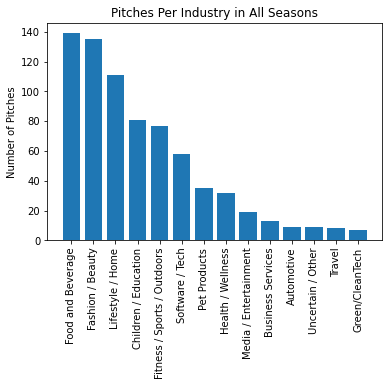

In [71]:
industry_counts = df_full['Industry'].value_counts()

index = []
new_d = {}
for i in range(0,len(d)):
    for key,value in d.items():
        if value==i:
            industry = key
    index.append(industry)
    new_d[industry] = industry_counts[i]

new_d = dict(sorted(new_d.items(), key=lambda x: x[1], reverse=True))

plt.bar(range(len(new_d)), list(new_d.values()), align='center')
plt.xticks(range(len(new_d)), list(new_d.keys()), rotation='vertical')
plt.title("Pitches Per Industry in All Seasons")
plt.ylabel("Number of Pitches")
plt.show()

We can clearly notice that there are industries with much more representation on the show, the top three being Food and Beverage, Fashion/Beauty, and Lifestyle/Home. The industries that are not as often seen on the show include the Automotive, Travel, and Green/CleanTech industries.

We will now inspect the proportion of deals per industry.

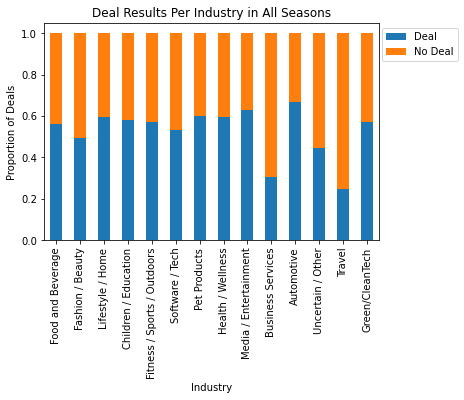

In [72]:
df = df_full[['Industry', 'Deal']].groupby('Industry').sum()
df['No Deal'] = industry_counts - df['Deal']

df['Sum'] = df['Deal'] + df['No Deal']
df = df.sort_values(by='Sum', ascending=False)

# make into proportions
def make_proportion(num, s):
    return num/s

df['Deal'] = df.apply(lambda x: make_proportion(df['Deal'], df['Sum']))
df['No Deal'] = df.apply(lambda x: make_proportion(df['No Deal'], df['Sum']))
df = df.drop(columns=['Sum'])

ax = df.plot.bar(stacked=True, title='Deal Results Per Industry in All Seasons')
ax.set_ylabel("Proportion of Deals")
ax = ax.set_xticklabels(list(new_d.keys()))
ax1 = plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

As you can see from the graph, about half of products from most industries get a deal. There are a few obvious exceptions: about 70% of the Automotive industry pitches get deals whereas only 25% of the Business Services and Travel industry pitches gets deals. This may make it seem that the industry that the company operates in has little to no effect on the likelihood to get a deal; however, something we haven for granted here is that over the 10 seasons the popularity of industries among the sharks hasn't changed. This may not be true and so we have to explore the change in the percentage of deals made by industry over the 10 seasons. The graph below omits industries that have fewer than 50 products over 10 seasons as we feel that the percentage change is not reflective of the change in industry popularity amongst sharks with such few observations. Thus, we are only checking the change in 6 industries, i.e. Fitness / Sports / Outdoors, Food and Beverage, Fashion / Beauty, Lifestyle / Home, Software / Tech, Children / Education. Note that in the graph below, we aren't looking at the percentage change for every season, rather we are looking at the change between season 1 and 10 as we only require the net difference from the beginning and the end. 

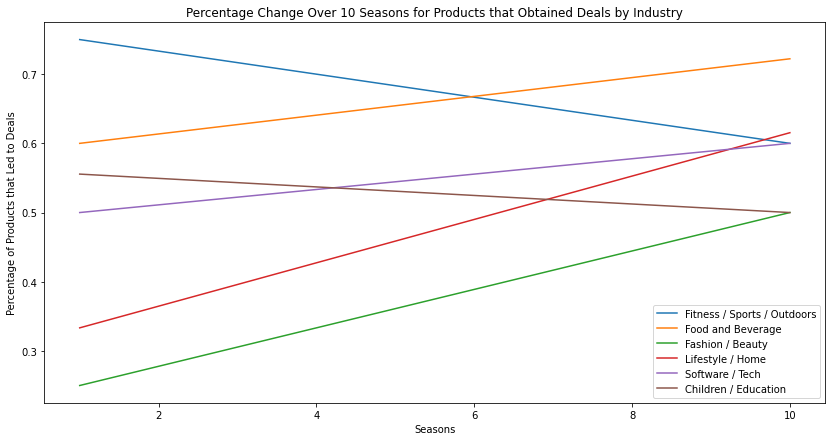

In [78]:
pv_ind_season_deal = pd.pivot_table(df_full[['Deal','Industry','Season']],index=["Industry","Deal"],columns=['Season'], aggfunc=len)
pv_ind_season_deal=pv_ind_season_deal.fillna(0)
diction={}
for i in range(0,14):
    ind=(pv_ind_season_deal.loc[i,1]/(pv_ind_season_deal.loc[i,0]+pv_ind_season_deal.loc[i,1]))
    ind=ind.fillna(0)
    diction[i]=ind.to_dict()
dataframe_ind=pd.DataFrame.from_dict(diction)
swap_d =  dict([(value, key) for key, value in d.items()]) 
dataframe_ind = dataframe_ind.rename(columns=swap_d)
dataframe_ind.drop(index=[2,3,4,5,6,7,8,9],inplace=True)
ax=dataframe_ind[['Fitness / Sports / Outdoors', 'Food and Beverage', 'Fashion / Beauty',
       'Lifestyle / Home', 'Software / Tech', 'Children / Education']].plot(figsize=(14,7), title="Percentage Change Over 10 Seasons for Products that Obtained Deals by Industry", xlabel="Seasons",ylabel="Percentage of Products that Led to Deals")
ax.xticks=[1,5,10]

As you can see in the graph above the 6 industries have considerably changed in popularity over the last 10 seasons. Fitness/Sports/Outdoors has seen the largest decline in deals from 75% in season 1 to 60% in season 10. Lifestyle/Home on the other hand has seen the largest increase in popularity, from 33% to 60%, amongst the sharks. One can say that the line's with a positive slope, show that in the future these industry products are more likely to get deals in shark tank, with the assumption that the popularity change remains around the same. Despite these observed trends, the most popular industries today are still Food and Beverage, Lifestyle/Home, Software/Tech, Fitness/Sports/Outdoors. We can safely say that a new product in shark belonging to these industries is more likely to get a deal than the other industries.

## Deals Made Per Season

We would like to see the proportions of deals secured to deals not made on the show in each season. This will help us determine whether participants of different seasons had more success than those of a different season.

We will begin by observing the number of deals made and not made in each season.

In [81]:
# get number of deals sorted by season
df_season = df_full[['Season', 'Deal']].groupby('Season').sum()
season_counts = df_full['Season'].value_counts()
season_counts

6.0     99
7.0     95
8.0     87
5.0     86
9.0     83
10.0    79
4.0     70
3.0     50
1.0     49
2.0     35
Name: Season, dtype: int64

Season 6 had the most total observations, while season 2 had the least total observations. We should consider the fact that there is differences in the amount of data between seasons, so we should consider proportions for our next insight: deals secured and deals not secured.

In [82]:
# separate into deals and not deals
df_season['No Deal'] = season_counts - df_season['Deal']
df_season['Sum'] = df_season['Deal'] + df_season['No Deal']
df_season = df_season.sort_values(by='Sum', ascending=False)

# make into proportions
def make_proportion(num, s):
    return num/s

df_season['Deal'] = df_season.apply(lambda x: make_proportion(df_season['Deal'], df_season['Sum']))
df_season['No Deal'] = df_season.apply(lambda x: make_proportion(df_season['No Deal'], df_season['Sum']))
df_season = df_season.drop(columns=['Sum'])

df_season

,Deal,No Deal
Season,,
6.0,0.555556,0.444444
7.0,0.568421,0.431579
8.0,0.632184,0.367816
5.0,0.453488,0.546512
9.0,0.662651,0.337349
10.0,0.658228,0.341772
4.0,0.457143,0.542857
3.0,0.440000,0.560000
1.0,0.448980,0.551020


The above data shows the proportion of deals to no deals for every season. Now, let's take a closer look at the distributions of deals throughout the seasons.

In [83]:
df_season.describe()

,Deal,No Deal
count,10.000000,10.000000
mean,0.541951,0.458049
std,0.088928,0.088928
min,0.440000,0.337349
25%,0.454402,0.383757
50%,0.549206,0.450794
75%,0.616243,0.545598
max,0.662651,0.560000


The mean and median are very close for both deal and no deal, so we can assume the distribution is not heavily skewed in any direction. We observe that the proportion of deals and no deals centers around 50%, meaning that for any given season we can predict that 50% of pitches will get a deal (within a certain range of error, described in our nonzero standard deviation). 

Having observed the numerical summaries for the data, we can observe the deal:no deal ratio in a stacked bar plot split by seasons.

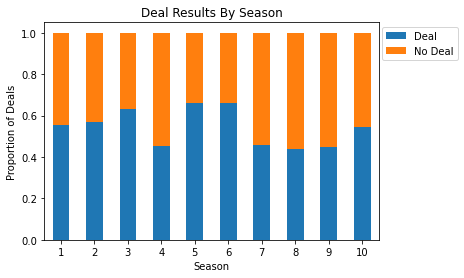

In [84]:
# stacked bar plot
ax = df_season.plot.bar(stacked=True, title='Deal Results By Season')
ax.set_ylabel('Proportion of Deals')
ax = ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], rotation=0)
ax1 = plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

From this plot, we see that although the proportions of deals made to not made changes slightly between seasons, there is no apparent trend in how these proportions change throughout the first 10 seasons of the show. We can assume that there is no significant influence on whether a deal is secured from which season the product appeared. In any given season, approximately half of the pitches acquire deals (based on our dataset). For this reason, we will not use season as a feature for predicting whether a deal is made.

## Race

In the next few cells, we explore how race comes into play in regards to overall diversity on the show. First, we created our race file by taking 2 random companies from each season and checking their race. Then, we import this csv file and standardize it to be able to merge with our full dataset that has been cleaned.

In [85]:
def standardize_race(string):
    string = string.strip()
    return string

In [86]:
df_race = pd.read_csv('SharkTank_Races.csv')
df_race['Company'] = df_race['Company'].apply(standardize_race)

In [87]:
df_race = df_full.merge(df_race, how='inner', on='Company')

We can see now that we have a new dataframe with the column 'Race.' We now want to take a look from our sample to see the distribution of races and see if we can find any biases.

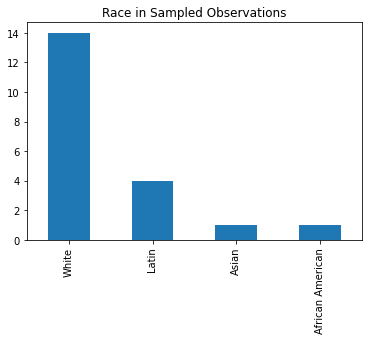

In [90]:
race_counts = df_race['Race'].value_counts()
overall_race = race_counts.plot.bar(title='Race in Sampled Observations')

Taking a look at the barplot above, we can see that there is an overwhelming difference between the amount of white
entrepreneurs and the other races. In addition, we can see that there were only 4 categories within race, so there are possibly other races that were just not within our sample. However, despite this possible inconsistency (meaning there could be other races, but we just did not find more), we can see the majority of the sample being white. This could present an idea that Shark Tank entrepreneurs are more likely to be white. Now withing race, let's look at the distrubition of getting a deal

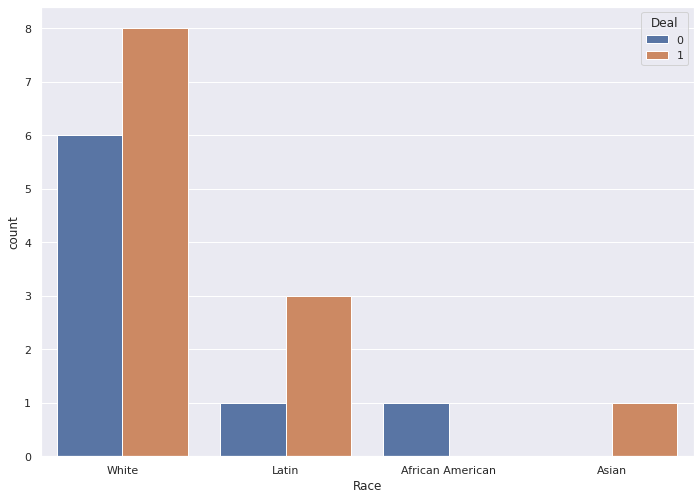

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="Race", hue="Deal", data=df_race)


While we can see that White people are more likely to get a deal on shark thank, the proportion of white entrepreneur obtaining a deal on on shark tank is still 8/(8+6)=57%, which is about the same as the general population on shark tank. Africian American and Asian entrepreneurs have very few data points, which isn't enough to understand what the proportion of people from those races do get deals. Similarly, even though the data shows that 75% of Latin American entrepreneurs are likely to get a deal, we must take into account that we only have 4 data points, which isn't sufficient to understand the actual distribution.

In [103]:
#going to now do descriptive analysis on race
df_race['Race'].describe()

count        20
unique        4
top       White
freq         14
Name: Race, dtype: object

Going into some descriptive analysis, since race is a categorical variable and we already took a look at the overall barplot for our sample, we can now use describe just to see if we can get more information. Based on the output above, we can see that out of all 4 races, white ended up being the top frequency of 14 out of 20 observations. This again demonstrates that there could be a bias when it comes to selecting the demographic of entrepreneurs on shark tank. If a larger sample was taken, it could be possible that this is slightly different, but with our current random sample, we see that white is the most common race seen on shark tank.Based on the current data, we have We can also infer that there lies no underlying bias for the deal distrubution amongst different races. However, this may not be reflective of reality as we only had access to twenty data points, which may not be enough to make these claims

## Gender

Now we will evaluate Gender (overall and per shark).

First we will take a look at the gender proportions of participants in Shark Tank.

Male      0.596180
Female    0.249659
Mixed     0.154161
Name: Gender, dtype: float64


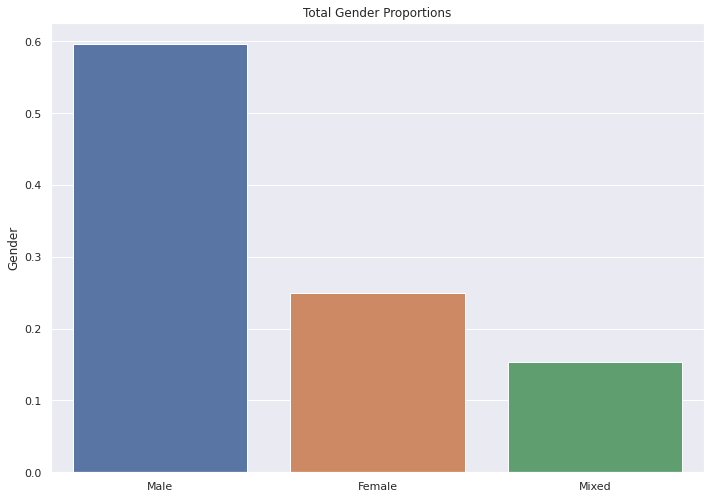

In [104]:
gender_prop = df_full['Gender'].value_counts() / len(df_full['Gender'])
gender_prop.index = ['Male','Female','Mixed']
print(gender_prop)
gender_prop_plot = sns.barplot(x=gender_prop.index, y=gender_prop, data=df_full).set_title('Total Gender Proportions')

At 60%, most of the participants in Shark Tank are men. 25% are women and 15% are a mixed group (i.e. both Male and Female).

Next, we go over the proportions of gender that got a deal, grouped by shark.

         Barbara   Daymond      Lori     Kevin      Mark    Robert     Guest
Male    0.461538  0.515625  0.495050  0.636364  0.622951  0.739726  0.476190
Female  0.415385  0.281250  0.356436  0.196970  0.262295  0.164384  0.261905
Mixed   0.123077  0.203125  0.148515  0.166667  0.114754  0.095890  0.261905

        Barbara   Daymond      Lori     Kevin      Mark    Robert     Guest
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000
mean   0.333333  0.333333  0.333333  0.333333  0.333333  0.333333  0.333333
std    0.183544  0.162630  0.174419  0.262869  0.261440  0.353609  0.123718
min    0.123077  0.203125  0.148515  0.166667  0.114754  0.095890  0.261905
25%    0.269231  0.242188  0.252475  0.181818  0.188525  0.130137  0.261905
50%    0.415385  0.281250  0.356436  0.196970  0.262295  0.164384  0.261905
75%    0.438462  0.398438  0.425743  0.416667  0.442623  0.452055  0.369048
max    0.461538  0.515625  0.495050  0.636364  0.622951  0.739726  0.476190


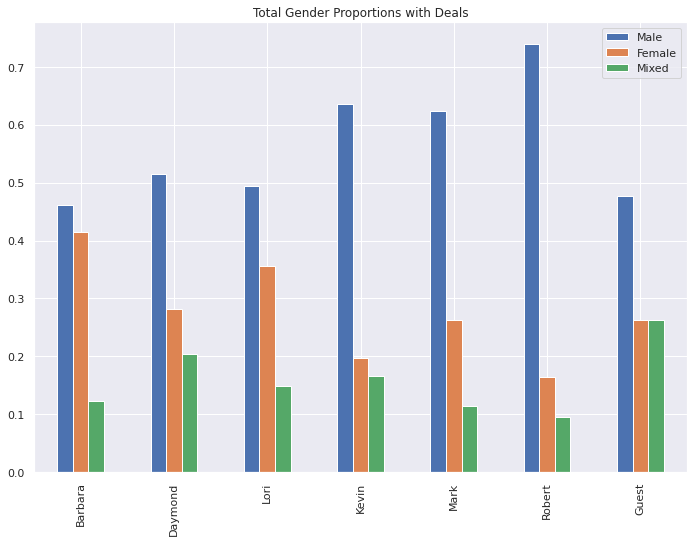

In [105]:
# proportions of gender that got a deal, grouped by shark
dict_shark = {}
gender_map = {0:'Male',1:'Female',2:'Mixed'}
total_per_shark = {'Barbara': 0,'Daymond': 0,'Lori': 0,'Kevin': 0,'Mark': 0,'Robert': 0,'Guest': 0}
for gender in [0,1,2]:
    gen=df_full[df_full['Gender']==gender]
    for ind, row in gen.iterrows():
        for shark in total_per_shark.keys():
            if row[shark] == 1:
                total_per_shark[shark] += 1
                if shark in dict_shark:
                    if gender_map[gender] in dict_shark[shark]:
                        dict_shark[shark][gender_map[gender]] += 1
                    else:
                        dict_shark[shark][gender_map[gender]] = 1
                else:
                    dict_shark[shark] = {}
                    dict_shark[shark][gender_map[gender]] = 1

# make proportions
dict_prop_by_shark = {}
for shark in total_per_shark.keys():
    for gender in ['Male', 'Female', 'Mixed']:
        if shark not in dict_prop_by_shark:
            dict_prop_by_shark[shark] = {}
        dict_prop_by_shark[shark][gender] = dict_shark[shark][gender] / total_per_shark[shark]
                    
df_shark_by_gender = pd.DataFrame(dict_prop_by_shark)
gender_per_shark_plt = df_shark_by_gender.transpose().plot.bar().set_title('Total Gender Proportions with Deals')

print(df_shark_by_gender)
print()
print(df_shark_by_gender.describe())

As you can probably tell, out of all the sharks, Robert gives the highest proportion of deals to men: 74% of his deals go to men, 16% go to women, and 10% go to mixed team. On the other side of the spectrum, Barbara is the shark who gives the most deals to women: 40% of her deals go to women, whereas 48% of her deals go to men and 13% go to a mixed team. If we use the proportion of genders that come on the show as a basis (meaning that sharks should, theoretically, give the same proportion of deals to each gender as the proportions that come on the show), which is 60% male/25% female/15% mixed team, then Barbara and Lori are biased towards women. With this same logic, Kevin and Robert are biased towards men. The rest of the sharks also seem to have some bias, though not as extreme. Let's use a 2-proportion z test to check if these biases are statistically significant.


To do so, we first have to recalculate the proportions without the "Mixed" gender groups. The 2-proportion z test can only compare 2 proportions, and the 2 proportions we care most about are male and female (which is why we will drop the Mixed gender).

First recompute the overall gender proportions without the Mixed gender groups:

Male      0.704839
Female    0.295161
Name: Gender, dtype: float64


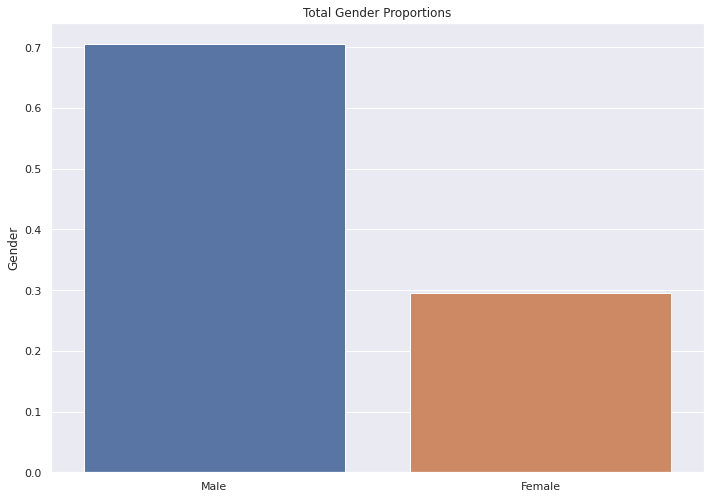

In [106]:
gender_prop = df_full['Gender'].value_counts()
gender_prop.index = ['Male','Female','Mixed']
gender_prop = gender_prop.drop(['Mixed'])
gender_prop = gender_prop / (gender_prop['Male'] + gender_prop['Female'])
print(gender_prop)
gender_prop_plot = sns.barplot(x=gender_prop.index, y=gender_prop, data=df_full).set_title('Total Gender Proportions')

The proportions between male and female didn't change too much, with the male proportions being 70% and female being 30%.

Next, let's recompute the gender proportions for each shark without the Mixed group.

         Barbara   Daymond      Lori     Kevin      Mark    Robert     Guest
Male    0.526316  0.647059  0.581395  0.763636  0.703704  0.818182  0.645161
Female  0.473684  0.352941  0.418605  0.236364  0.296296  0.181818  0.354839

        Barbara   Daymond      Lori     Kevin      Mark    Robert     Guest
count  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000
mean   0.500000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000
std    0.037216  0.207973  0.115110  0.372838  0.288081  0.449977  0.205289
min    0.473684  0.352941  0.418605  0.236364  0.296296  0.181818  0.354839
25%    0.486842  0.426471  0.459302  0.368182  0.398148  0.340909  0.427419
50%    0.500000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000
75%    0.513158  0.573529  0.540698  0.631818  0.601852  0.659091  0.572581
max    0.526316  0.647059  0.581395  0.763636  0.703704  0.818182  0.645161


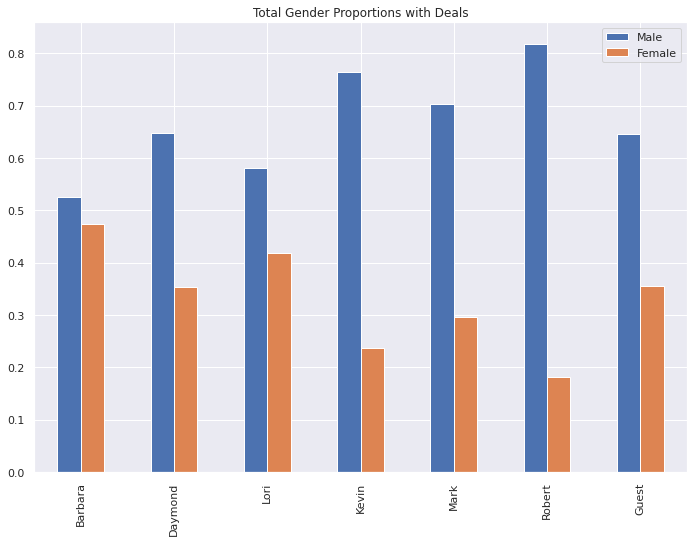

In [107]:
# proportions of gender that got a deal, grouped by shark
dict_shark = {}
gender_map = {0:'Male',1:'Female'}
total_per_shark = {'Barbara': 0,'Daymond': 0,'Lori': 0,'Kevin': 0,'Mark': 0,'Robert': 0,'Guest': 0}
for gender in [0,1]:
    gen=df_full[df_full['Gender']==gender]
    for ind, row in gen.iterrows():
        for shark in total_per_shark.keys():
            if row[shark] == 1:
                total_per_shark[shark] += 1
                if shark in dict_shark:
                    if gender_map[gender] in dict_shark[shark]:
                        dict_shark[shark][gender_map[gender]] += 1
                    else:
                        dict_shark[shark][gender_map[gender]] = 1
                else:
                    dict_shark[shark] = {}
                    dict_shark[shark][gender_map[gender]] = 1

# make proportions
dict_prop_by_shark = {}
for shark in total_per_shark.keys():
    for gender in ['Male', 'Female']:
        if shark not in dict_prop_by_shark:
            dict_prop_by_shark[shark] = {}
        dict_prop_by_shark[shark][gender] = dict_shark[shark][gender] / total_per_shark[shark]
                    
df_shark_by_gender = pd.DataFrame(dict_prop_by_shark)
gender_per_shark_plt = df_shark_by_gender.transpose().plot.bar().set_title('Total Gender Proportions with Deals')

print(df_shark_by_gender)
print()
print(df_shark_by_gender.describe())

The values of the sharks' gender distributions didn't change much as well. However, it's vital so that we can test if sharks are independently biased towards different genders. We now will run the 2-proportion z test on every shark with the null hypotheses being that every shark should give deals to the same proportion of genders that give pitches (70% male, 30% female):

In [108]:
dict_shark
significance = 0.1

# get male/female number in population
male_pop, female_pop, not_used = df_full['Gender'].value_counts()

# loop through shark names
for shark in total_per_shark.keys():
    male_shark, female_shark = dict_shark[shark].values()
    males = np.array([male_shark, male_pop])
    totals = np.array([male_shark + female_shark, male_pop + female_pop])
    stat, p_value = proportions_ztest(count=males, nobs=totals,  alternative='two-sided')

    # report
    print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
    if p_value > significance:
        print("Fail to reject the null hypothesis for " + shark)
    else:
        print("Reject the null hypothesis for " + shark)

z_stat: -2.788, p_value: 0.005
Reject the null hypothesis for Barbara
z_stat: -0.866, p_value: 0.387
Fail to reject the null hypothesis for Daymond
z_stat: -2.319, p_value: 0.020
Reject the null hypothesis for Lori
z_stat: 0.921, p_value: 0.357
Fail to reject the null hypothesis for Kevin
z_stat: -0.024, p_value: 0.981
Fail to reject the null hypothesis for Mark
z_stat: 1.941, p_value: 0.052
Reject the null hypothesis for Robert
z_stat: -0.709, p_value: 0.478
Fail to reject the null hypothesis for Guest


From the 2 proportion z-test, we find that for Barbara and Lori we have a low enough p-value (<0.1) to reject the null hypothesis that every shark should give deals to the same proportion of genders that give pitches (70% male, 30% female). For both these sharks we find that they are more likely to give females on the show a deal than other sharks.

Alternatively, we find the opposite true for Robert. With a p-value of 0.052, which is less than 0.1, we can reject the null hypothesis and state that Robert favors one gender over the other when giving a deal. Looking closely at graphs made above, we find that Robert is more likely to give a male on the show a deal than other sharks.

For the remaining sharks, we fail to reject the null hypothesis due to the p-value being higher than the significance. We can accept the null and state that sharks other than Barbara, Lori, and Robert give deals to the same proportion of genders that give pitches (70% male, 30% female)

## Gender vs Status

{'Male': {'Out of Business': 0.5909090909090909,
  'In Business/Aquired': 0.5783132530120482},
 'Female': {'Out of Business': 0.2597402597402597,
  'In Business/Aquired': 0.26506024096385544},
 'Mixed': {'Out of Business': 0.14935064935064934,
  'In Business/Aquired': 0.1566265060240964}}

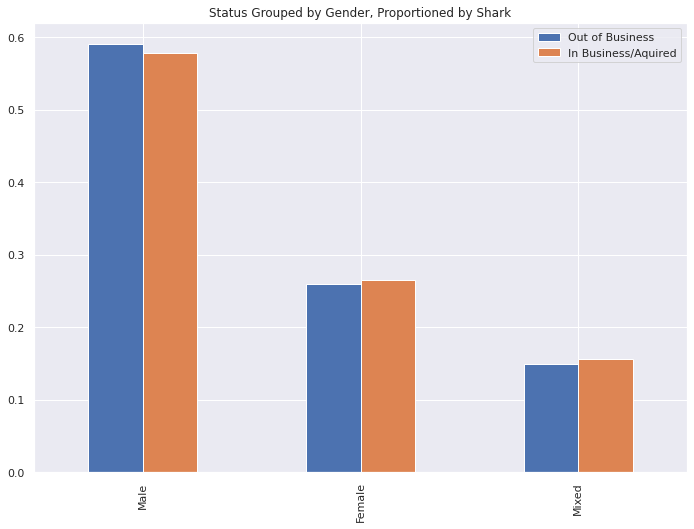

In [121]:
# Status grouped by gender, proportioned by status
dict_status = {'Out of Business': {}, 'In Business/Aquired': {}}
total_per_status = {'Out of Business': 0, 'In Business/Aquired': 0} # used to get the proportions
gender_map = {0:'Male', 1:'Female', 2:'Mixed'}
status_map = {0: 'Out of Business', 1: 'In Business/Aquired'}
for gender in [0,1,2]:
    gen=df_full[df_full['Gender']==gender]
    for ind, row in gen.iterrows():
        if row['Status'] == -1: # TODO if you want only deals, add this:  row['Deal'] != 1 or
            continue

        gender_str = gender_map[gender]
        status = status_map[row['Status']]
        total_per_status[status] += 1
        if gender_str in dict_status[status]:
            dict_status[status][gender_str] += 1
        else:
            dict_status[status][gender_str] = 1

# make proportions
dict_prop_by_status = {}
for s in ['Out of Business', 'In Business/Aquired']:
    for gender in gender_map.values():
        if gender not in dict_prop_by_status:
            dict_prop_by_status[gender] = {}
        dict_prop_by_status[gender][s] = dict_status[s][gender] / total_per_status[s]

df_status_by_gender = pd.DataFrame(dict_prop_by_status)
df_status_by_gender.transpose().plot.bar().set_title('Status Grouped by Gender, Proportioned by Shark')
dict_prop_by_status

Based on the calculations above, we wanted to take a look at gender versus status to see if there are any significant observations we can make. By the plot above, we can see that the 3 gender categories of male, female, and both male/female all have roughly equal proportions of either going out of business or who stayed in business. This demonstrates that roughly the same amount of male run businesses fail or succeed as female run businesses (and same for businesses run by both genders). Thus, gender probably does not affect whether or not their company stays in or goes out of business. If doing only ones that got deals: after everyone gets deals, the same proportion of male run businesses fail/succeed as female run businesses (same for businesses run by both genders). This could be a result of sharks being unbiased of gender after giving deals, though it's impossible to say for certain since there are many outside influences that determine a business's success or failure.

## Gender vs Season

In [118]:
# proportions of gender per season
dict_season = {}
gender_map = {0:'Male', 1:'Female', 2:'Mixed'}
total_per_season = {}
for ind, row in df_full.iterrows():
    # get gender string and season
    gender = gender_map[row['Gender']]
    season = int(row['Season'])
    
    # initialize keys in dataframes
    if season not in dict_season:
        dict_season[season] = {}
    if season not in total_per_season:
        total_per_season[season] = 0

    # initialize gender key in dataframe value
    if gender not in dict_season[season]:
        dict_season[season][gender] = 0

    dict_season[season][gender] += 1
    total_per_season[season] += 1
    
dict_season = dict(sorted(dict_season.items(), key=lambda x: x[0], reverse=False))
    
# make proportions
for season in dict_season:
    for gender in dict_season[season]:
        dict_season[season][gender] /= total_per_season[season]
        


Text(0, 0.5, 'Proportion')

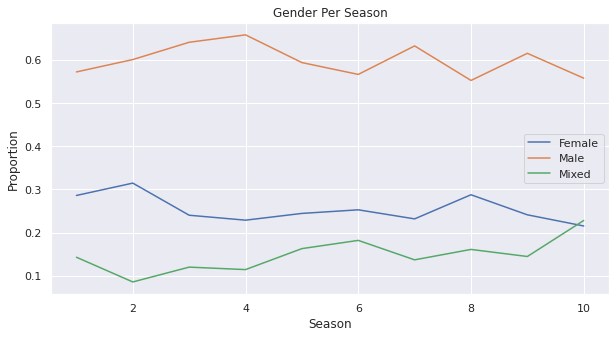

In [120]:
df_season = pd.DataFrame(dict_season)
gender_per_season_plot = df_season.transpose().plot(figsize=(10,5))
gender_per_season_plot.set_title('Gender Per Season')
gender_per_season_plot.set_xlabel('Season')
gender_per_season_plot.set_ylabel('Proportion')

Looking at the plot above, we want to now discuss the relationship between gender and season. We are able to see the trends between the proportion of genders as we go through the seasons (1-10) of the show. First looking at Males, we can see that there is a much higher proportion (approximately .55) than females and mixed genders right at the first season. Looking at the trend for males, there is an incline in proportion from seasons 1-3 with a smaller incline from 3-4. From seasons 4-6 we see a decline. From seasons 6-10 we see a sharp 'triangle' of increase and then decrease and then again.

Taking a look at Females, we can see that their proportion at the start is appropximately .29/.3, which is much lower than the Males starting point. We then see a decline from seasons 2-3 and a very very small increase from seasons 3-6. Eventually from seasons 7-9 we see an increase then decrease 'triangle' shape again, but almost like an inverse when comparing to the males trend.

As for the Mixed group, we can see that overall there is a small increase, but it veries throughout the 10 seasons with decreases in the beginning, but small increases from seasons 2-6. Then we see a smaller 'triangle' shape seasons 7-9 with a sharp increase seasons 9-10.

Now we want to see trends between these groups over the seasons. Clearly, we can see that there are many more males on the show per season than females. Females do not even ever reach as close to the shortest proportion point to males. This indicates that the show significantly hosts more males or indicates that there are more male entrepreneurs than female entrepreneurs. In addition, from seasons 7-8 we see that there is a drop of male proportions from approximately .65 to .55 while female proportions increase from approximately .25 to .30. This could indicate that the show wanted to have more female owned companies or in that specific season/year, there tended to be more female entrepreneurs. We see an opposite pattern going from seasons 8-9. From this, it may indicate that the show possibly began to trade between more males versus females on the show to make things even, but this could not be a guarenteed assumption.

## Deal vs Ask Equity/Valuation

Next, we will try to see if ask equity and valuation of the product/company has an effect on whether or not they get a deal.

Here is a boxplot of ask equity versus whether or not a company got a deal. This will allow us to figure out if ask equity affects getting a deal. Below that is the written data of the boxplot.

In [ ]:
print(df_full[df_full['Deal'] == 0]['Ask_equity'].describe())
print()
print(df_full[df_full['Deal'] == 1]['Ask_equity'].describe())
deal_vs_aequity = sns.boxplot(x='Deal', y="Ask_equity", data=df_full, showfliers=False).set_title('Ask Equity vs Got a Deal')

The amount of ask equity doesn't seem to have a large effect on whether a product/company gets a deal or not. All of the descriptive variables are similar except for the median, which is slightly lower in the ones that got a deal. This means that products/companies that ask for lower equities could potentially have a slight advantage towards getting a deal, though it might not be significant. We will analyze this further later on.

In [ ]:
print(df_full[df_full['Deal'] == 0]['Ask_valuation'].describe())
print()
print(df_full[df_full['Deal'] == 1]['Ask_valuation'].describe())
deal_vs_aval = sns.boxplot(x='Deal', y="Ask_valuation", data=df_full, showfliers=False).set_title('Ask Valuation vs Got a Deal')

The amount of ask valuation seems to have a larger effect than ask equity on whether a product/company gets a deal or not. Both mean and median of products/companies that got a deal are lower than those that didn't get a deal. Both those that got and didn't get deals are skewed to the right, meaning that there are fewer companies that give more extreme valuations. Again, we do not yet know if this difference is statistically significant. We will analyze this further later on.

## Deal vs Status

Next, we take a look at whether or not a company got a deal and whether or not they are still in business or went out of business. We get the proportions of the company's status (either out of business or still in business) and we group it according to whether or not they got a deal from a shark.

In [ ]:
# experimental: look at proportion of products that got deals are still in business/out of business vs the products that
# didn't get deals and are still in business/out of business (i.e. check if getting a shark deal actually helps you to
# stay in business). i.e. the question is: does getting a deal actually help your company stay in business

# Status grouped by gender, proportioned by status
dict_status = {'Out of Business': {}, 'In Business/Aquired': {}}
total_per_status = {'Out of Business': 0, 'In Business/Aquired': 0} # used to get the proportions
status_map = {0: 'Out of Business', 1: 'In Business/Aquired'}
deal_map = {0: 'No Deal', 1: 'Deal'}
for ind, row in df_full.iterrows():
    # skip unknown statuses
    if row['Status'] == -1:
        continue
        
    # get status and deal
    status = status_map[row['Status']]
    deal = deal_map[row['Deal']]
    
    # initialize dict_status value if necessary and then increment in dict
    if deal not in dict_status[status]:
        dict_status[status][deal] = 0
    total_per_status[status] += 1
    dict_status[status][deal] += 1

    
# make proportions
for status in dict_status:
    for deal in dict_status[status]:
        dict_status[status][deal] /= total_per_status[status]

df_status = pd.DataFrame(dict_status)
ax = df_status.plot.bar(stacked=True, title='Deal vs Status', colors=['Orange', 'Blue'])
ax.set_xlabel("Deal")
ax.set_ylabel("Proportion of Status Success")
ax = ax.set_xticklabels(["No Deal", "Deal"], rotation=0)
ax1 = plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

# analysis: Getting a deal in shark tank actually makes a difference in making you not go out of business.

Looking at the plot above, we can see that there is a difference in proportions between the groups. Looking at the No Deal category, we can see that roughly 60% of those who did not get a deal went out of business with 40% of them staying in business. On the other hand, the Deal category demonstrates that approximately 45% go out of business while approximately 55% stay in business. This signifies that companies are more likely to stay in business when getting a deal with a shark than not.

## Feature Correlation

We would like to determine which variables are significantly correlated with a deal being made for each of the following: gender, industry, ask equity, ask price, and ask valuation.

We're first going to explore gender and industry and their correlation with deal. Since these are all categorical variables, we'll be using the chi-squared test to check for correlation.

##### Gender Correlation with Deal

In [217]:
table = df_full[['Gender','Deal']].pivot_table(index='Gender', columns='Deal', 
                        aggfunc=len, fill_value=0)
# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(table)
# select significance value
alpha = 0.1
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.100, p=0.065
Variables are associated (reject H0)


Since the p-value is smaller than the level of significance, we will reject the null hypothesis for the alternative and confirm that the variables are associated. Knowing that gender influences the chance of getting a deal will be important to keep in mind when we attempt to predict the chance of getting a deal based on given features.

##### Industry Correlation with Deal

In [218]:
table = df_full[['Industry','Deal']].pivot_table(index='Industry', columns='Deal', 
                        aggfunc=len, fill_value=0)
# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(table)
# select significance value
alpha = 0.1
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.100, p=0.607
Variables are not associated(fail to reject H0)


Since the p-value is greater than the level of significance, we fail to reject the null hypothesis and accept that the variables are not associated. However, we cannot take only this test as fact, so we will take the result with a grain of salt. We can still consider the industry an important feature, even if the chi squared test doesn't show association.

#### Ask Equity/Amount/Valuation Correlation between Deals

Next we will be running statistical analysis on ask equity, ask amount, and ask valuation. These analysis require correlation between a continuous and categorical variable rather than two categorical variables as was with gender vs deal and industry vs deal.

Below, we will try to find the correlation between ask equity/amount/valuation and getting a deal. We will first check that the distribution is normal for ask equity, amount, and valuation, as this is a requirement for all correlation tests between continuous (e.g. equity, amount, valuation) and categorical (e.g. deal) variables.

##### Ask Equity Correlation between Deals

NormaltestResult(statistic=136.29479854133763, pvalue=2.5348983031872992e-30)


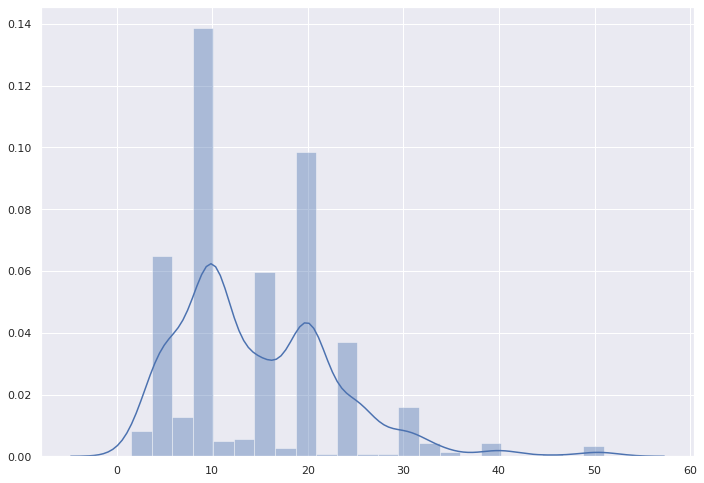

In [156]:
df_ask_equity = df_full[(df_full['Ask_equity'] > 0) & (df_full['Ask_equity'] < 60)] # Removing outliers
sns.distplot(df_ask_equity['Ask_equity']).set_xlabel('')

print(normaltest(df_ask_equity['Ask_equity'].values))

The above data distrubution is not normal as the observed p-value is extremely small. A simple glance at the graph also tells us that it isn't normal.

Below, we will try to normalize it by taking the log of the Ask_equity column:

NormaltestResult(statistic=17.59831710272021, pvalue=0.00015085996261368097)


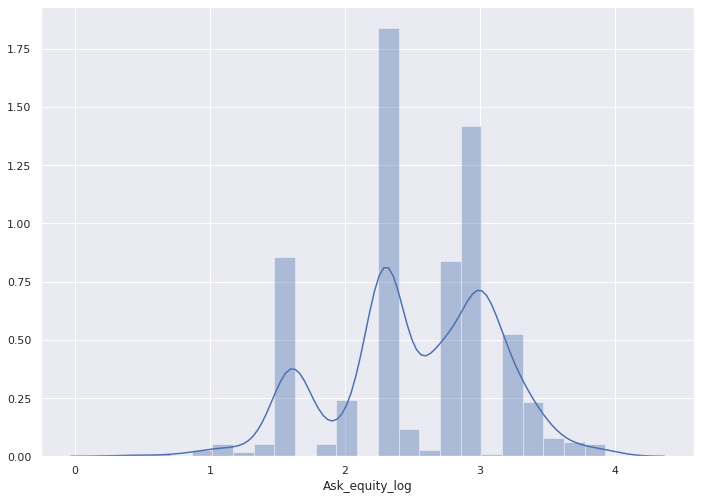

In [157]:
df_ask_equity['Ask_equity_log'] = np.log(df_full['Ask_equity'])
df_ask_equity = df_ask_equity[(df_ask_equity['Ask_equity_log'] > 0)]
sns.distplot(df_ask_equity['Ask_equity_log'])

print(normaltest(df_ask_equity['Ask_equity_log'].values))

Unfortunately, we were unable to get a normal distribution. Thus, we are unable to run the biserial coefficiency computation. Despite this, we cannot completely rule out the effect of ask valuation on the chance of getting a deal. We will still consider the feature when making a prediction about a future deal, since we neither confirm nor reject the association between these two variables.

##### Amount Correlation between Deals

NormaltestResult(statistic=294.4171186638509, pvalue=1.1698629669594926e-64)


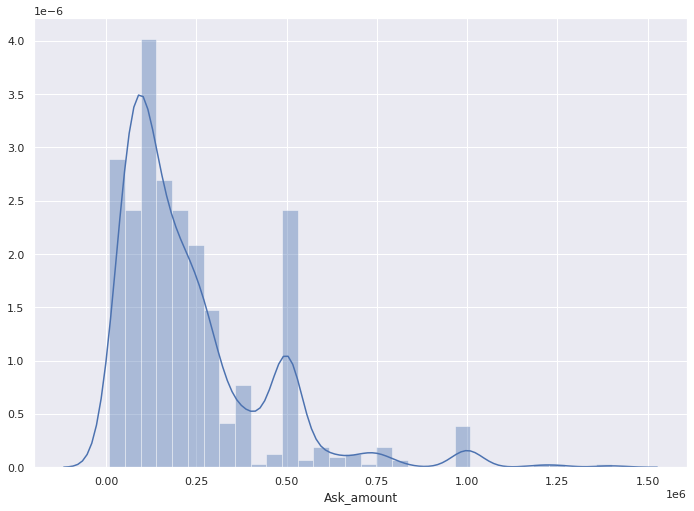

In [129]:
# Ask amount normal distribution and test
df_ask_amount = df_full[(df_full['Ask_amount'] > 0) & (df_full['Ask_amount'] < 1500000)] # use 1500000 to ignore outliers
sns.distplot(df_ask_amount['Ask_amount'])

print(normaltest(df_ask_amount['Ask_amount'].values))

Above, we can see that the distribution is not normal. We can confirm this by running a normal test computation on the distribution and the result tells us that this is not a normal distribution. To fix this, we will attempt to use the log function on the data (just as we did in ask equity).

NormaltestResult(statistic=4.50325574621146, pvalue=0.10522778757552358)


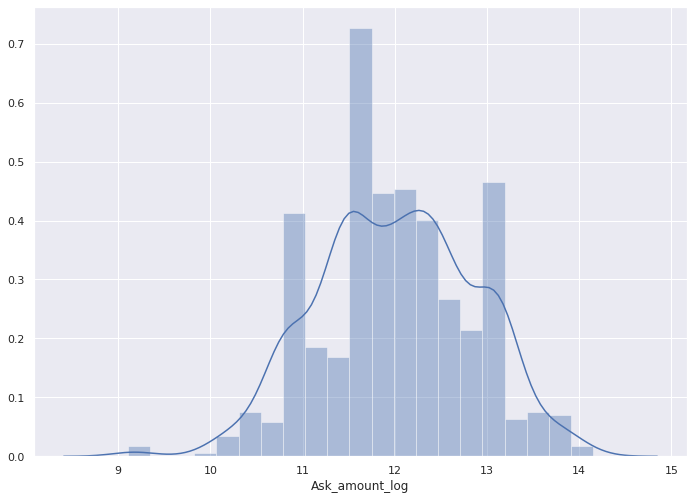

In [130]:
# Ask amount normal distribution and test with logs
df_ask_amount = df_full[(df_full['Ask_amount'] > 0) & (df_full['Ask_amount'] < 1500000)]
df_ask_amount['Ask_amount_log'] = np.log(df_ask_amount['Ask_amount'])
sns.distplot(df_ask_amount['Ask_amount_log'])

print(normaltest(df_ask_amount['Ask_amount_log'].values))

The distribution now looks normal. We can confirm this by looking at the p-value of the normaltest computation, which is significantly greater than the alpha of 0.01.

Now, we begin to run the biserial correlation analysis:

In [131]:
# Get correlation value and p value using biserial function in scipy
correlation, p = pointbiserialr(df_ask_amount['Deal'], df_ask_amount['Ask_amount_log'])

# select significance value
alpha = 0.1

# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0) with correlation of ' + str(correlation))
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.100, p=0.255
Variables are not associated(fail to reject H0)


From using the biserial function, we find that the p-value is above the significance level, so we cannot reject the null hypothesis and state that the variables ask amount (log'ed) and deal are not associated. In other words, the ask equity does not seem to have a strong influence on the chance of getting a deal.

##### Valuation Correlation between Deals

NormaltestResult(statistic=190.5511779312805, pvalue=4.191190993111656e-42)


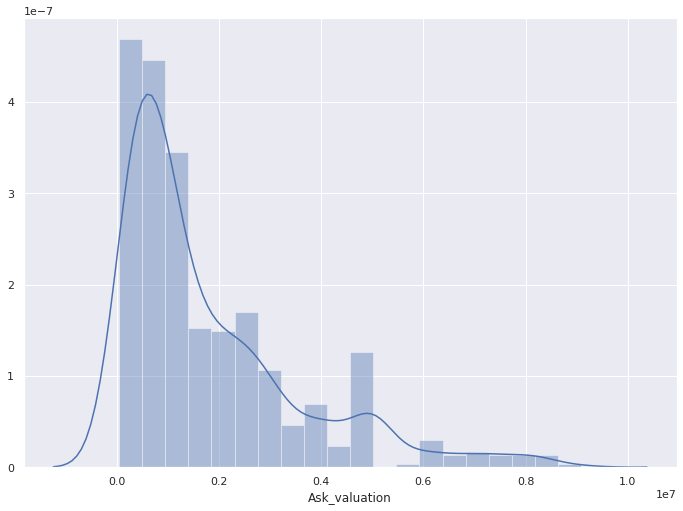

In [150]:
# Ask valuation normal distribution and test
df_ask_val = df_full[(df_full['Ask_valuation'] > 0) & (df_full['Ask_valuation'] < 10000000)] # use 1500000 to ignore outliers
sns.distplot(df_ask_val['Ask_valuation'])

print(normaltest(df_ask_val['Ask_valuation'].values))

NormaltestResult(statistic=21.927865027432333, pvalue=1.7315084261812327e-05)


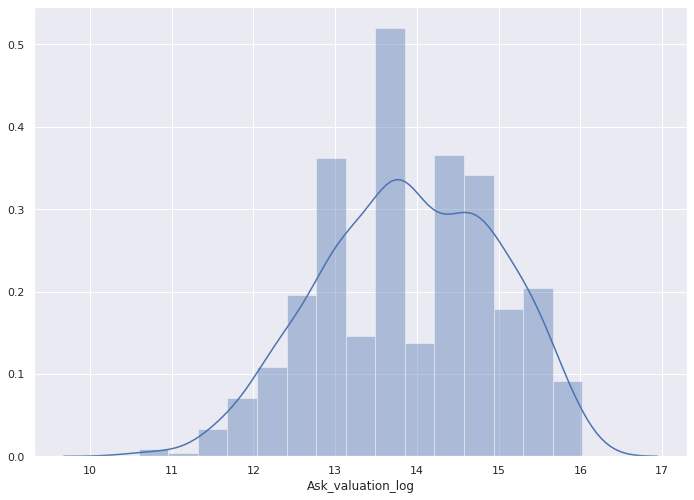

In [151]:
# Ask amount normal distribution and test with logs
df_ask_val = df_full[(df_full['Ask_valuation'] > 0) & (df_full['Ask_valuation'] < 10000000)]

# Attempted to use several different methods of normalization
# average = df_ask_val['Ask_valuation'].mean()
# df_ask_val['Ask_valuation_log'] = (df_ask_val['Ask_valuation']-average)/(max(df_ask_val['Ask_valuation'])-min(df_ask_val['Ask_valuation']))

df_ask_val['Ask_valuation_log'] = np.log(df_ask_val['Ask_valuation'])
sns.distplot(df_ask_val['Ask_valuation_log'])

print(normaltest(df_ask_val['Ask_valuation_log'].values))

Unfortunately, even after trying to normalize the data for a long time, we were unable to get a normal distribution. Thus, we are unable to run the biserial coefficiency computation.

Although we did not run a the biserial coefficiency test, we cannot completely rule out the effect of ask valuation on the chance of getting a deal. We will still consider the feature when making a prediction about a future deal, since we neither confirm nor reject the association between these two variables.

## Prediction: Logistic Regression

To make predictions on which candidate will get a deal (or not), we want to choose the features that are actually meaningful to predicting deals. We use a feature selection on a logisitic regression classifier with up to 6 features that could be meaningful. We use 10-fold CV to standarize our accuracy.

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

X = df_full[['Season', 'Industry', 'Gender', 'Ask_amount', 'Ask_equity', 'Ask_valuation']]
Y = df_full['Deal']
clf= LogisticRegression(C=2)
# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=6,
           forward=True,
           floating=True,
           scoring='accuracy',
           cv=10)

# Perform SFFS
sfs = sfs1.fit(X,Y)
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.44594595, 0.44594595, 0.82432432, 0.69863014, 0.56164384,
         0.54794521, 0.54794521, 0.54794521, 0.54794521, 0.54794521]),
  'avg_score': 0.5716216216216218,
  'feature_names': ('Season',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.44594595, 0.55405405, 0.47297297, 0.68493151, 0.78082192,
         0.54794521, 0.54794521, 0.54794521, 0.54794521, 0.54794521]),
  'avg_score': 0.5678452425027768,
  'feature_names': ('Season', 'Gender')},
 3: {'feature_idx': (0, 2, 4),
  'cv_scores': array([0.44594595, 0.55405405, 0.63513514, 0.7260274 , 0.68493151,
         0.57534247, 0.54794521, 0.56164384, 0.54794521, 0.54794521]),
  'avg_score': 0.5826915957052943,
  'feature_names': ('Season', 'Gender', 'Ask_equity')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.44594595, 0.58108108, 0.62162162, 0.7260274 , 0.67123288,
         0.57534247, 0.54794521, 0.56164384, 0.54794521, 0.54794521]),
  'avg_score': 0.5826730840429472

We wanted to find which features are meaningful in predicting whether or not a candidate gets a deal on shark tank or not. We used logistic regression as our model prediction, since it is simple, works well for categorical prediction, and intuitive. But first, to programmatically check which features are most important in predicting deals, we used the method of sequential feature selection (SFS). For each possible number of feature subsets (from 1 feature to 6 features), the SFS method loops through all combinations of features and chooses the best ones. (For example, as you can see above, the most significant subset with only one feature was {season}, whereas the most significant subset with only 3 features was {season, gender, ask equity}.) We used 10-folds cross validation to test each subset model against a part of the dataset it hasn’t seen (acting as the validation/testing data). This can help us assess the true accuracy of the models made of each subset, and also to ensure we don’t simply overfit the data. 

As you can see, the best subset (the one with the highest accuracy) is the 3-feature subset of {season, gender, ask equity}. This subset gave the logistic regression model the accuracy of 58.3%, which is the best accuracy of all other possible subset selections for any other number of features. However, this accuracy was still not desirable; at 58.3%, its prediction power is just a little bit better than random chance (random chance would be 50% accurate, since we only have 2 choices: deal or no deal). With that, we can conclude that using this model we can predict correctly only about 60% of the time whether a candidate, given his or her season, gender, and ask equity, gets a deal on Shark Tank.  


# ETHICS & PRIVACY: 

### How did we check the validity of the data and make sure it was accurate based on the show?
We had two datasets that we needed to validate. For each, we randomly chose 20 products to manually check if they were inputted correctly into the tables. For each of the 40 episodes we randomly looked at and checked across the datasets, all the values were accurate. Not only that, but when we merged the two datasets, we made sure to check all the values of “deal” were the same. For example, we checked that wherever one dataset had a “deal” so did the other dataset. (With this, we actually came across a few mistakes on Halley’s dataset and corrected them.) 
### Do/will you have permission to use this data / use it for this purpose?
We will use datasets that are publicly available on sites like Kaggle or scraped data from publicly available websites to assure that we have permission to use the data.
### Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?
Since this data is available on public websites and/or datasets (which were originally gathered from the very public television show), there are no privacy concerns regarding the data or terms of use that we need to comply with.
### Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
The dataset doesn’t take into account the race and socioeconomic background of the entrepreneur which could impact an entrepreneur’s ability to score a deal. The dataset composes people who were already on the show and public. 
We wanted to check if there was bias with respect to race or gender: 
Race: since the dataset didn’t include any information regarding race, we took a random sample of 20 products from all 10 seasons to try and see the distribution of race. From that random sample, we were able to see that white is the dominant race in the show, but since we had so little data and barely any representation of any other races, we couldn’t conclude whether there was any bias or not in getting a deal for any particular race.  
Gender: our dataset did include information on gender, and so in our analysis we checked for any bias with respect to gender. We found the following: (1) There appeared more men than females in the show over its 10 seasons, (2) some sharks (Barbara, Lori, Robert) are more likely to accept deals for one gender over another with statistical significance, (3) gender doesn’t influence being in business or out of business (we can only conclude that with respect to Shark Tank participants, not in general). For more gender bias or evidence, see our analysis part. 
### Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
Financial information can be a sensitive and private topic of information, so we would not want to use any person’s personal financial information as a factor in our analysis. 
### How will you handle issues you identified?
If any personal information from the pitch is in the data, we will scrap these columns from the set and not take them into account for the analysis. However, with this data, we are simply using publicly released info from the television show, so we should not run into this issue.


# Conclusion:

The goal of the project was to research to what extent do factors such as gender, industry, ask equity, ask price, ask valuation, and season affect the likelihood of securing a deal in Shark Tank.

We began by researching pitches that have appeared on the show and pinpointed some important features that may affect the success of a pitch and the chance of securing a deal with a shark. Once we pinpointed the features we wanted to analyze, we looked for available datasets that fit our research question. Although we found some relevant ones, we also found that they were missing some data we wanted, particularly about the monetary details behind the pitches. For this reason, we found websites that described the pitches in greater detail and scraped them for this information. After gathering all the necessary info, we found a way to merge the necessary data in one main dataset.

To begin our analysis, we looked at the distributions of each feature and analyzed the relationships between different features in the data. We found that the industry of the project plays an important role in obtaining a deal. Food and Beverages were deemed to be the most popular industry amongst sharks with about a quarter of the products getting a deal. We also saw the gender distribution and how it affected getting a deal from particular sharks. Our results showed us that Barbara and Lori were more likely to invest in female entrpreneurs, where as Robert was less likely to do so. In order to dig deeper and see exactly how a variable is correlated with obtaining a deal, we performed hypothesis testing such as Chi square tests, z-tests, and p tests. We found that gender showed a stronger association to getting a deal than others, but found that we could not fully rule out the influence of any variable on the chance of getting a deal.

After finding the relationships between different variables, we tried to validate these findings by seeing what permutation of features gave us the highest accuracy in predicting whether an entrepreneur woudl get a deal or not. First, to programmatically check which features are most important in predicting deals, we used the method of sequential feature selection (SFS), which loops through all combinations of features for each possible number of feature subsets and chooses the best ones. We then used logistic regression as our model prediction, since it is simple, works well for categorical prediction, and is intuitive. We found that our logistic regression model gives us an accuracy of 58.3%, which is slightly higher than the outcome due to pure chance (50%). The features that led to this were season, gender, and the ask equity. While gender was an expected result, season and ask_equity went on to surprise us. Since we couldn't perform a correlation test on ask equity (non-normal distribution), the SFS and Logistic Regression model shows us how it matters and has a part to play in the decision making process of sharks. While we don't have a concrete reasoning for why season was included, we can hypothesise that with the growing popularity of the show, more successful products are found by the production, which lead to an increased percentage of people obtaining a deal.

# Limitations

There are certainly limitations to our analysis. For one, we did not have much data on race, so we had to use random samples. For this reason, we cannot be very sure of the accuracy in regards to the racial bias observed or how race affects the chance of getting a deal on the show. Additionally, we did not find data on revenue or profit of the products pitched on the show, which is typically an important factor for investors to decide whether to invest in a product or company. Lastly, we did not have data from entreprenuers that were not featured on the show to use as a comparison for our results. Although we analyzed features of products who appeared on the show, we did not factor in other characteristics that may have resulted in the choice to actually get the chance to pitch on the show. A heavy influence comes from the directors, who decide which people/products to feature on the show, so we cannot be sure completely of how a neutral pitch would favor on the show (if chosen).

# Discussion

Although we didn't have incredibly strong results for the predictions, we believe that the analyses made in this project can be useful to many people. For one, the biases in the deal securing process can be analysed by the sharks in order to minimize/remove gender and racial bias in the future seasons. Also, this could be useful for budding entrepreneurs who are thinking about making a pitch on Shark Tank. By understanding the significance of different features, future entrepreneurs could learn what to change in their pitches and companies to set themselves up for success on the show and onwards.

As potential extensions of this project, we would wanna focus on issues we weren't able to fix in this first iteration of work on the project. First, we would want to increase the amount of data for race, gender, and revenue to find stronger associations between the variables and use this to create a stronger, more accurate predictor for Shark Tank pitch success.

# Team Contributions

- Ido Durst (Mater - from Cars)
    - Cleaned Halley’s dataset
    - Merged the two datasets (which took way longer than I imagined…)
    - Worked on EDA
    - Worked on feature selection
    - Wrote analysis and conclusions for parts of EDA (industry, gender, race) and the feature selection/prediction part. 
    - Attended team meetings
- Amit Bar (Dug - from the movie UP)
    - Searched for datasets and websites to scrape from
    - Scraped from Shark Tank Tales and cleaned/standardized the data, as well as writing the explanations for it
    - Assisted on merging the two datasets together and testing to ensure it was correct
    - Did the Gender analysis and EDA (including charts and explanations)
    - Coded the correlation computations (i.e. ask equity, ask amount, ask evaluation) in the EDA
    - Wrote various explanations throughout the entire project
    - Attended team meetings
- Harshi Agrawal (Jasmine - from Aladdin )
    - Searched for datasets and converted spreadsheet to csv files
    - Collected random sample to help look at racial bias and described the data found in relation to this
    - Cleaned the dataset
    - Wrote analysis for gender, race, deals, and status
    - Explained the data cleaning process and how we got our full dataset
    - Attended team meetings
- Alise (Eve - from WALL-E)
    - Scraped data
    - Cleaned data 
    - Contributed to EDA on the Season and Gender
    - Added analysis for graphs
    - Worked on correlations between features
    - Attended team meetings
    - Conclusion
- Parth Shah (Mowgli - from the Jungle Book)
    - Looked for different datasets and decided on the most important ones
    - Worked on Scraping data from different websites
    - Worked on cleaning the data
    - Performed EDA for Gender, Race, and performed some of the feature correlations (Hypothesis Testing)
    - Wrote analysis for a few graphs and statistical results
    - Attended team meetings
    - Conclusion
